In [1]:
import calendar
import itertools
import numpy as np
import pandas as pd
import matplotlib.colors as mpt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Primero se carga el archivo SDA (Spectral Deconvolution Algorithm) en un dataframe llamado df_SDA el cual tiene información del AOD total (Total_AOD_500nm[tau_a] y la separación de sus componentes de modo fino (Fine_Mode_AOD_500nm[tau_f]) y modo grueso (Coarse_Mode_AOD_500nm[tau_c]) entre otros valores.

In [2]:
df_SDA_Solar = pd.read_csv('20170101_20241231_Ny_Alesund_AWI.ONEILL_lev20', skiprows=6)
df_SDA_Solar.head()

,Date_(dd:mm:yyyy),Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:06:2017,14:40:44,152,152.611620,0.037667,0.022946,0.014721,0.609188,0.002192,0.006152,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:06:2017,14:43:43,152,152.613692,0.038537,0.023117,0.015420,0.599865,0.002260,0.006116,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:06:2017,14:49:43,152,152.617859,0.039112,0.023042,0.016070,0.589130,0.002105,0.005967,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:06:2017,14:52:43,152,152.619942,0.039937,0.023451,0.016486,0.587200,0.002345,0.005989,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:06:2017,14:55:43,152,152.622025,0.039746,0.023554,0.016192,0.592614,0.002186,0.006188,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Hacemos lo mismo para los dato de tipo lunar.

In [3]:
df_SDA_Lunar = pd.read_csv('Lunar_20170101_20241231_Ny_Alesund_AWI.ONEILL_lev15', skiprows=6)
df_SDA_Lunar.head()

,Date_(dd:mm:yyyy),Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Exact_Wavelengths_of_AOD(um)_412nm,Exact_Wavelengths_of_AOD(um)_400nm,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,06:10:2017,19:05:36,279,279.795556,0.028077,0.016435,0.011642,0.585352,0.000596,0.003896,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,06:10:2017,19:10:36,279,279.799028,0.026445,0.015217,0.011228,0.575417,0.000977,0.004070,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,06:10:2017,19:15:36,279,279.802500,0.026914,0.015729,0.011186,0.584400,0.000815,0.003878,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,06:10:2017,19:20:36,279,279.805972,0.026706,0.015508,0.011198,0.580691,0.000828,0.003978,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,06:10:2017,19:25:36,279,279.809444,0.028765,0.017243,0.011522,0.599458,0.000499,0.003897,...,-999.0,-999.0,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Unimos los dos DataFrames.

In [4]:
df_SDA = pd.concat([df_SDA_Solar, df_SDA_Lunar], ignore_index=True)
df_SDA.head()

,Date_(dd:mm:yyyy),Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4,Lunar_Zenith_Angle(Degrees),Lunar_Phase_Angle(Degrees)
0,01:06:2017,14:40:44,152,152.611620,0.037667,0.022946,0.014721,0.609188,0.002192,0.006152,...,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN
1,01:06:2017,14:43:43,152,152.613692,0.038537,0.023117,0.015420,0.599865,0.002260,0.006116,...,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN
2,01:06:2017,14:49:43,152,152.617859,0.039112,0.023042,0.016070,0.589130,0.002105,0.005967,...,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN
3,01:06:2017,14:52:43,152,152.619942,0.039937,0.023451,0.016486,0.587200,0.002345,0.005989,...,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN
4,01:06:2017,14:55:43,152,152.622025,0.039746,0.023554,0.016192,0.592614,0.002186,0.006188,...,0.3796,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN


Verificamos las columnas que existen y sus propiedades.

In [5]:
#df_SDA.info()

Luego se hacen una modificaciones al df_SDA para eliminar columnas cuyo valor medio es -999.0 ya que no contienen información útil y este valor es simbólico para no dejar la columna sin datos, luego se reemplazan los -999.0 por NaN en las otras columnas para que no generen inconvenientes a la hora de tratar estos y finalmente se agrega una nueva columna donde se convierte la fecha [Date_(dd:mm:yyyy)] a otra fecha [Date_(yyyy:mm:dd)] que tendrá un formato fecha que será útil posteriormente, obteniendo así df_SDA_Fixed.

In [6]:
df_SDA_Numeric = df_SDA.select_dtypes(include = [np.number])
df_SDA_Drop = df_SDA_Numeric.columns[df_SDA_Numeric.mean() == -999.0]
df_SDA_Fixed = df_SDA.drop(columns = df_SDA_Drop)
df_SDA_Fixed.replace(-999.0, np.nan, inplace = True)
df_SDA_Fixed['Date_(yyyy:mm:dd)'] = pd.to_datetime(df_SDA_Fixed['Date_(dd:mm:yyyy)'], format='%d:%m:%Y')
df_SDA_Fixed.head()

,Date_(dd:mm:yyyy),Time_(hh:mm:ss),Day_of_Year,Day_of_Year(fraction),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],FineModeFraction_500nm[eta],2nd_Order_Reg_Fit_Error-Total_AOD_500nm[regression_dtau_a],RMSE_Fine_Mode_AOD_500nm[Dtau_f],...,Measurement_Type(solar or lunar),Number_of_Wavelengths,Exact_Wavelengths_of_AOD(um)_870nm,Exact_Wavelengths_of_AOD(um)_675nm,Exact_Wavelengths_of_AOD(um)_500nm,Exact_Wavelengths_of_AOD(um)_440nm,Exact_Wavelengths_of_AOD(um)_380nm,Lunar_Zenith_Angle(Degrees),Lunar_Phase_Angle(Degrees),Date_(yyyy:mm:dd)
0,01:06:2017,14:40:44,152,152.611620,0.037667,0.022946,0.014721,0.609188,0.002192,0.006152,...,solar,5,0.8689,0.6744,0.5,0.4397,0.3796,NaN,NaN,2017-06-01
1,01:06:2017,14:43:43,152,152.613692,0.038537,0.023117,0.015420,0.599865,0.002260,0.006116,...,solar,5,0.8689,0.6744,0.5,0.4397,0.3796,NaN,NaN,2017-06-01
2,01:06:2017,14:49:43,152,152.617859,0.039112,0.023042,0.016070,0.589130,0.002105,0.005967,...,solar,5,0.8689,0.6744,0.5,0.4397,0.3796,NaN,NaN,2017-06-01
3,01:06:2017,14:52:43,152,152.619942,0.039937,0.023451,0.016486,0.587200,0.002345,0.005989,...,solar,5,0.8689,0.6744,0.5,0.4397,0.3796,NaN,NaN,2017-06-01
4,01:06:2017,14:55:43,152,152.622025,0.039746,0.023554,0.016192,0.592614,0.002186,0.006188,...,solar,5,0.8689,0.6744,0.5,0.4397,0.3796,NaN,NaN,2017-06-01


Aquí se crea otro dataframe (df_SDA_Simplified) que contiene solo las columnas de interés donde se aplicará luego una condición para determinar eventos de alta turbiedad dependiendo de los valores de tau_f y tau_c.

In [7]:
df_SDA_Simplified=df_SDA_Fixed[['Date_(yyyy:mm:dd)','Time_(hh:mm:ss)','Total_AOD_500nm[tau_a]',
                                'Fine_Mode_AOD_500nm[tau_f]','Coarse_Mode_AOD_500nm[tau_c]']]
df_SDA_Simplified.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c]
0,2017-06-01,14:40:44,0.037667,0.022946,0.014721
1,2017-06-01,14:43:43,0.038537,0.023117,0.015420
2,2017-06-01,14:49:43,0.039112,0.023042,0.016070
3,2017-06-01,14:52:43,0.039937,0.023451,0.016486
4,2017-06-01,14:55:43,0.039746,0.023554,0.016192


Ordenamos los datos por fechas y reseteamos el índice.

In [8]:
df_SDA_Simplified = df_SDA_Simplified.copy()
df_SDA_Simplified.sort_values('Date_(yyyy:mm:dd)', inplace=True)
df_SDA_Simplified.reset_index(drop=True, inplace=True)
df_SDA_Simplified.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c]
0,2017-06-01,14:40:44,0.037667,0.022946,0.014721
1,2017-06-01,15:49:43,0.039192,0.023448,0.015744
2,2017-06-01,15:52:43,0.038495,0.023018,0.015477
3,2017-06-01,15:55:43,0.038528,0.023290,0.015238
4,2017-06-01,15:58:43,0.038759,0.023072,0.015686


Se establecen los umbrales para el modo fino (percentil 85) y modo grueso (percentil 93) replicando la metodología del póster.

In [9]:
tau_f = np.percentile(df_SDA_Simplified['Fine_Mode_AOD_500nm[tau_f]'].dropna(), 85)
tau_c = np.percentile(df_SDA_Simplified['Coarse_Mode_AOD_500nm[tau_c]'].dropna(), 93)
print("Percentil 85 para tau_f:", round(tau_f,4))
print("Percentil 93 para tau_c:", round(tau_c,4))

Percentil 85 para tau_f: 0.0706
Percentil 93 para tau_c: 0.0447


Aquí se aplican las condiciones para evaluar eventos de alta turbiedad o no y se obtiene el dataframe df_SDA_Turbid que contiene todas las filas donde se cumple alguna de las condiciones.

In [10]:
df_SDA_Turbid = df_SDA_Simplified[
    (df_SDA_Simplified['Fine_Mode_AOD_500nm[tau_f]'] >= tau_f) | 
    (df_SDA_Simplified['Coarse_Mode_AOD_500nm[tau_c]'] >= tau_c)]
df_SDA_Turbid.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c]
47,2017-06-03,14:05:01,0.078227,0.022595,0.055633
50,2017-06-03,14:11:01,0.072912,0.021911,0.051001
51,2017-06-03,14:20:35,0.075453,0.023861,0.051593
52,2017-06-03,14:35:01,0.099222,0.023348,0.075874
165,2017-06-05,14:11:20,0.075480,0.023100,0.052380


Aquí se identifican todas las fechas donde se cumplen las condiciones establecidas, que luego se reducirán al aplicar la siguiente condición.

In [11]:
Events_Dates = df_SDA_Turbid['Date_(yyyy:mm:dd)'].unique()
Events_Dates

<DatetimeArray>
['2017-06-03 00:00:00', '2017-06-05 00:00:00', '2017-06-06 00:00:00',
 '2017-07-03 00:00:00', '2017-07-25 00:00:00', '2017-08-19 00:00:00',
 '2017-08-20 00:00:00', '2017-08-21 00:00:00', '2017-08-22 00:00:00',
 '2017-08-23 00:00:00',
 ...
 '2024-11-20 00:00:00', '2024-11-23 00:00:00', '2024-12-11 00:00:00',
 '2024-12-12 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-15 00:00:00', '2024-12-16 00:00:00', '2024-12-17 00:00:00',
 '2024-12-22 00:00:00']
Length: 388, dtype: datetime64[ns]

Aquí se eliminan las fechas donde haya menos de 3 medidas porque no se podrá aplicar l condición de que se deben tener al menos 3 medidas consecutivas instantáneas para considerarlo un evento de alta turbiedad.

In [12]:
Events_Dates_1 = [ii for ii in Events_Dates if len(df_SDA_Turbid[df_SDA_Turbid['Date_(yyyy:mm:dd)'] == ii]) >= 3]
Events_Dates_1 = pd.to_datetime(Events_Dates_1)
Events_Dates_1

DatetimeIndex(['2017-06-03', '2017-07-03', '2017-08-20', '2017-08-21',
               '2017-09-11', '2017-09-14', '2017-09-15', '2017-10-06',
               '2017-10-07', '2017-11-03',
               ...
               '2024-11-15', '2024-11-16', '2024-11-17', '2024-11-18',
               '2024-11-19', '2024-12-11', '2024-12-12', '2024-12-15',
               '2024-12-17', '2024-12-22'],
              dtype='datetime64[ns]', length=310, freq=None)

Aquí se crea un nuevo dataframe df_SDA_Turbid_2 que contiene los valores para las fechas que se habían identificado como alta turbiedad y además tienen 3 o más datos.

In [13]:
df_SDA_Turbid_2 = df_SDA_Turbid[df_SDA_Turbid['Date_(yyyy:mm:dd)'].isin(Events_Dates_1)]
df_SDA_Turbid_2.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c]
47,2017-06-03,14:05:01,0.078227,0.022595,0.055633
50,2017-06-03,14:11:01,0.072912,0.021911,0.051001
51,2017-06-03,14:20:35,0.075453,0.023861,0.051593
52,2017-06-03,14:35:01,0.099222,0.023348,0.075874
858,2017-07-03,05:04:40,0.081928,0.024989,0.056938


Aquí se aplica la condición de que un día debe tener al menos 3 medidas instantáneas consecutivas que cumplan con las condiciones establecidas anteriormente por tau_f y tau_c, esto se logra al revisar el índice de las medidas de cada día porque donde se hayan índices no consecutivos es que esas medidas no cumplieron con las condiciones impuestas a tau_f y tau_c.

In [14]:
dates_with_3 = []
dates_without_3 = []

for jj in Events_Dates_1:
    indices = df_SDA_Turbid_2[df_SDA_Turbid_2['Date_(yyyy:mm:dd)'] == jj].index.tolist()
    consecutive_counts = sum((np.diff(indices) == 1).astype(int))
    
    if consecutive_counts < 2:
        dates_without_3.append(jj)
    else:
        dates_with_3.append(jj)

dates_with_3 = pd.to_datetime(dates_with_3)
dates_without_3 = pd.to_datetime(dates_without_3)

print("Fechas que cumplen que hayan al menos 3 medidas instantáneas consecutivas):")
print(dates_with_3)
print("\nFechas que no cumplen que hayan al menos 3 medidas intantáneas consecutivas:")
print(dates_without_3)

Fechas que cumplen que hayan al menos 3 medidas instantáneas consecutivas):
DatetimeIndex(['2017-06-03', '2017-07-03', '2017-08-20', '2017-08-21',
               '2017-09-14', '2017-09-15', '2017-10-06', '2017-10-07',
               '2017-11-05', '2017-11-06',
               ...
               '2024-11-15', '2024-11-16', '2024-11-17', '2024-11-18',
               '2024-11-19', '2024-12-11', '2024-12-12', '2024-12-15',
               '2024-12-17', '2024-12-22'],
              dtype='datetime64[ns]', length=280, freq=None)

Fechas que no cumplen que hayan al menos 3 medidas intantáneas consecutivas:
DatetimeIndex(['2017-09-11', '2017-11-03', '2018-03-23', '2018-03-30',
               '2018-04-24', '2018-06-23', '2018-10-27', '2019-04-07',
               '2019-04-30', '2019-05-08', '2019-06-02', '2019-12-14',
               '2019-12-15', '2020-02-06', '2020-05-17', '2020-05-22',
               '2020-07-28', '2020-12-01', '2021-04-14', '2021-05-23',
               '2021-06-09', '2021-06-30

Aquí se crea otro dataframe df_SDA_Turbid_3 que contiene los datos para las fechas que cumplan con todas las condiciones, la de los valores de tau_f, tau_c y que hayan al menos 3 medidas consecutivas.

In [15]:
df_SDA_Turbid_3 = df_SDA_Turbid_2[df_SDA_Turbid_2['Date_(yyyy:mm:dd)'].isin(dates_with_3)]
df_SDA_Turbid_3.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c]
47,2017-06-03,14:05:01,0.078227,0.022595,0.055633
50,2017-06-03,14:11:01,0.072912,0.021911,0.051001
51,2017-06-03,14:20:35,0.075453,0.023861,0.051593
52,2017-06-03,14:35:01,0.099222,0.023348,0.075874
858,2017-07-03,05:04:40,0.081928,0.024989,0.056938


Aquí se hace una clasificación para cada medida sobre si se tiene un valor Fine, Coarse o Mixture que luego será utilizado para identificarlos conrrectamente en los gráficos.

In [16]:
conditions = [
    (df_SDA_Turbid_3['Fine_Mode_AOD_500nm[tau_f]'] >= tau_f) & (df_SDA_Turbid_3['Coarse_Mode_AOD_500nm[tau_c]'] < tau_c),
    (df_SDA_Turbid_3['Coarse_Mode_AOD_500nm[tau_c]'] >= tau_c) & (df_SDA_Turbid_3['Fine_Mode_AOD_500nm[tau_f]'] < tau_f),
    (df_SDA_Turbid_3['Fine_Mode_AOD_500nm[tau_f]'] >= tau_f) & (df_SDA_Turbid_3['Coarse_Mode_AOD_500nm[tau_c]'] >= tau_c)]

clasifications = ['Fine', 'Coarse', 'Mixture']
df_SDA_Turbid_3 = df_SDA_Turbid_3.copy()
df_SDA_Turbid_3['Classification'] = np.select(conditions, clasifications)
df_SDA_Turbid_3.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
47,2017-06-03,14:05:01,0.078227,0.022595,0.055633,Coarse
50,2017-06-03,14:11:01,0.072912,0.021911,0.051001,Coarse
51,2017-06-03,14:20:35,0.075453,0.023861,0.051593,Coarse
52,2017-06-03,14:35:01,0.099222,0.023348,0.075874,Coarse
858,2017-07-03,05:04:40,0.081928,0.024989,0.056938,Coarse


El siguiente código aplica unas condiciones para que cada fecha se agregue a una DateTime correspondiente a la naturaleza del evento (Fino, Coarse o Mixture), los arrays creados se muestran en las siguientes celdas.

In [17]:
fine_days = []
coarse_days = []
mixture_days = []

for date, group in df_SDA_Turbid_3.groupby('Date_(yyyy:mm:dd)'):
    fine_indices = group[group['Classification'] == 'Fine'].index.tolist()
    coarse_indices = group[group['Classification'] == 'Coarse'].index.tolist()
    mixture_indices = group[group['Classification'] == 'Mixture'].index.tolist()

    has_fine = any(fine_indices[i+2] - fine_indices[i] <= 2 for i in range(len(fine_indices) - 2))
    has_coarse = any(coarse_indices[i+2] - coarse_indices[i] <= 2 for i in range(len(coarse_indices) - 2))
    has_mixture = any(mixture_indices[i+2] - mixture_indices[i] <= 2 for i in range(len(mixture_indices) - 2))

    if has_mixture or (has_fine and has_coarse):
        mixture_days.append(date)
    elif has_fine:
        fine_days.append(date)
    elif has_coarse: 
        coarse_days.append(date)

df_SDA_Fine = pd.to_datetime(fine_days)
df_SDA_Coarse = pd.to_datetime(coarse_days)
df_SDA_Mixture = pd.to_datetime(mixture_days)

Array con las fechas donde se ha identificado un evento de aerosol mixto.

In [18]:
df_SDA_Mixture

DatetimeIndex(['2018-04-02', '2018-04-04', '2019-05-11', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2020-01-04',
               '2020-01-06', '2020-01-07', '2020-01-15', '2020-02-05',
               '2020-02-09', '2020-03-16', '2020-04-02', '2020-04-03',
               '2020-04-10', '2020-04-11', '2020-05-03', '2020-05-05',
               '2020-05-06', '2020-07-18', '2021-08-10', '2021-09-10',
               '2022-04-09', '2022-05-04', '2022-05-10', '2022-05-14',
               '2022-06-02', '2023-07-19', '2023-07-23', '2023-10-04',
               '2024-03-18', '2024-03-26', '2024-03-31', '2024-04-01',
               '2024-09-23', '2024-11-15', '2024-11-18', '2024-11-19',
               '2024-12-11', '2024-12-17'],
              dtype='datetime64[ns]', freq=None)

Array con las fechas donde se ha identificado un evento de aerosol fino.

In [19]:
df_SDA_Fine

DatetimeIndex(['2017-08-20', '2017-08-21', '2017-09-14', '2017-09-15',
               '2018-04-05', '2018-04-06', '2018-04-10', '2018-04-19',
               '2018-04-23', '2018-04-26',
               ...
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-23',
               '2023-09-30', '2023-10-05', '2024-03-17', '2024-03-23',
               '2024-03-29', '2024-04-02'],
              dtype='datetime64[ns]', length=121, freq=None)

Array con las fechas donde se ha identificado un evento de aerosol grueso.

In [20]:
df_SDA_Coarse

DatetimeIndex(['2017-06-03', '2017-10-06', '2017-10-07', '2017-11-05',
               '2017-11-06', '2017-11-08', '2017-11-09', '2018-03-03',
               '2018-05-03', '2018-06-11',
               ...
               '2024-03-24', '2024-09-20', '2024-09-21', '2024-09-22',
               '2024-10-19', '2024-11-16', '2024-11-17', '2024-12-12',
               '2024-12-15', '2024-12-22'],
              dtype='datetime64[ns]', length=108, freq=None)

Se crea un Array con las fechas donde se tienen datos pero no se ha identificado ni un evento.

In [21]:
df_SDA_Normal = df_SDA_Simplified[~df_SDA_Simplified['Date_(yyyy:mm:dd)'].isin(df_SDA_Turbid_3['Date_(yyyy:mm:dd)'].unique())]
df_SDA_Normal = df_SDA_Normal['Date_(yyyy:mm:dd)'].unique()
df_SDA_Normal

<DatetimeArray>
['2017-06-01 00:00:00', '2017-06-04 00:00:00', '2017-06-05 00:00:00',
 '2017-06-06 00:00:00', '2017-06-08 00:00:00', '2017-06-09 00:00:00',
 '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00',
 '2017-06-22 00:00:00',
 ...
 '2024-03-28 00:00:00', '2024-10-18 00:00:00', '2024-10-22 00:00:00',
 '2024-11-13 00:00:00', '2024-11-20 00:00:00', '2024-11-23 00:00:00',
 '2024-12-10 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-16 00:00:00']
Length: 477, dtype: datetime64[ns]

Se crea un Array con las fechas donde no se tienen datos.

In [22]:
df_SDA_Simplified = df_SDA_Simplified.copy()
range_dates = pd.date_range(start=df_SDA_Simplified['Date_(yyyy:mm:dd)'].min(),
                             end=df_SDA_Simplified['Date_(yyyy:mm:dd)'].max())
df_SDA_Missing = range_dates.difference(df_SDA_Simplified['Date_(yyyy:mm:dd)'])
df_SDA_Missing

DatetimeIndex(['2017-06-02', '2017-06-07', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-06-17',
               ...
               '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-07',
               '2024-12-08', '2024-12-09', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-21'],
              dtype='datetime64[ns]', length=2005, freq=None)

Se hizo un nuevo dataframe df_SDA_Summary que contiene un resumen del total de eventos identificados por cateogría para cada año y el número de días disponibles.

In [23]:
start_date = df_SDA_Turbid_3['Date_(yyyy:mm:dd)'].min()
end_date = df_SDA_Turbid_3['Date_(yyyy:mm:dd)'].max()
total_days_range = pd.date_range(start=start_date, end=end_date).nunique()

years = sorted(df_SDA_Turbid_3['Date_(yyyy:mm:dd)'].dt.year.unique())

summary_data = {"Category": ["No turbidity (Gray Points)", "Fine events (Red Points)", 
                             "Coarse events (Blue Points)", "Mixture events (Purple Points)", 
                             "No Available Days (White Points)", "Total Available Days"]}

for year in years:
    normal_days = len(df_SDA_Normal[df_SDA_Normal.year == year])
    fine_days = len(df_SDA_Fine[df_SDA_Fine.year == year])
    coarse_days = len(df_SDA_Coarse[df_SDA_Coarse.year == year])
    mixture_days = len(df_SDA_Mixture[df_SDA_Mixture.year == year])
    
    total_days_year = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31").nunique()
    total_available_days = normal_days + fine_days + coarse_days + mixture_days
    total_no_available_days = total_days_year - total_available_days  
    summary_data[year] = [normal_days, fine_days, coarse_days, mixture_days, total_no_available_days, total_available_days]  

df_SDA_Summary = pd.DataFrame(summary_data)
df_SDA_Summary.set_index("Category", inplace=True)
df_SDA_Summary

,2017,2018,2019,2020,2021,2022,2023,2024
Category,,,,,,,,
No turbidity (Gray Points),50,83,36,73,80,93,35,27
Fine events (Red Points),4,12,11,25,18,20,27,4
Coarse events (Blue Points),7,7,7,29,16,20,7,15
Mixture events (Purple Points),0,2,5,15,2,5,3,10
No Available Days (White Points),304,261,306,224,249,227,293,310
Total Available Days,61,104,59,142,116,138,72,56


Luego se hacen unos gráficos que muestran los días en el eje x y el mes correspondiente en el eje y, se tiene entonces un gráfico para cada año donde los cuadros de color blanco significa que para ese día no se tienen datos, de color gris significa que se tienen datos pero no se identificó ni un evento, el color rojo indica la presencia de un evento de partículas finas, el color azul un evento de partículas gruesas y finalmente el color morado indica que se tiene un evento de partículas mixto.

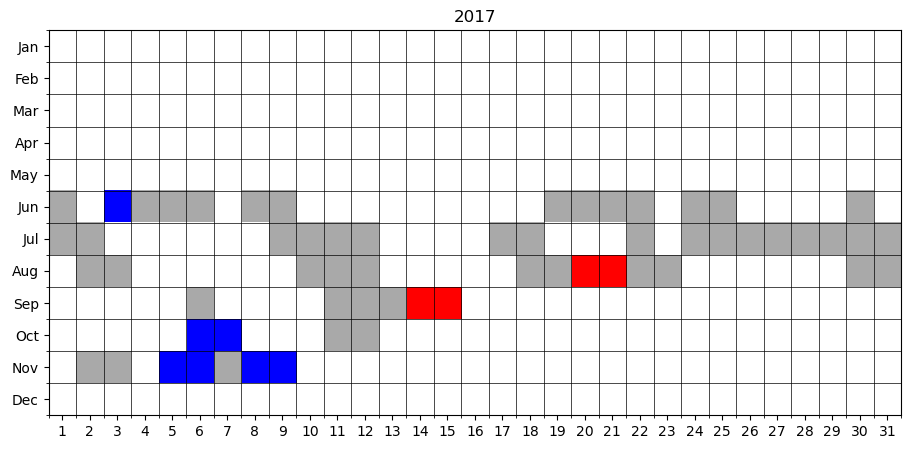

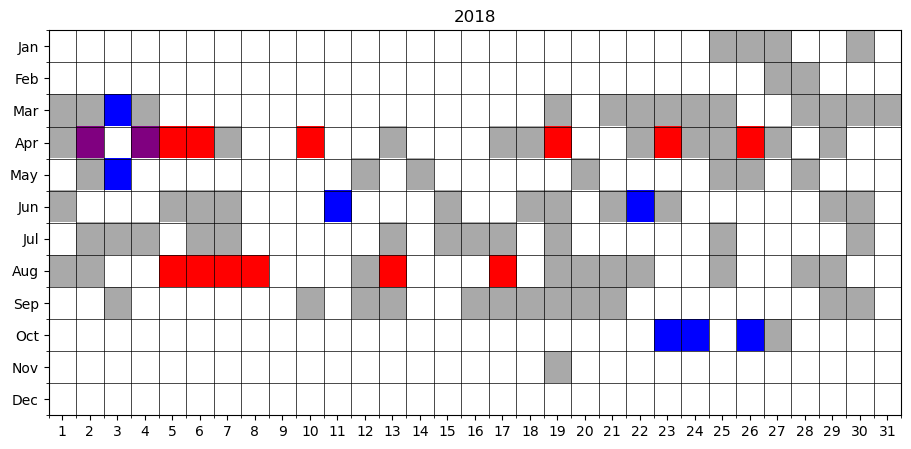

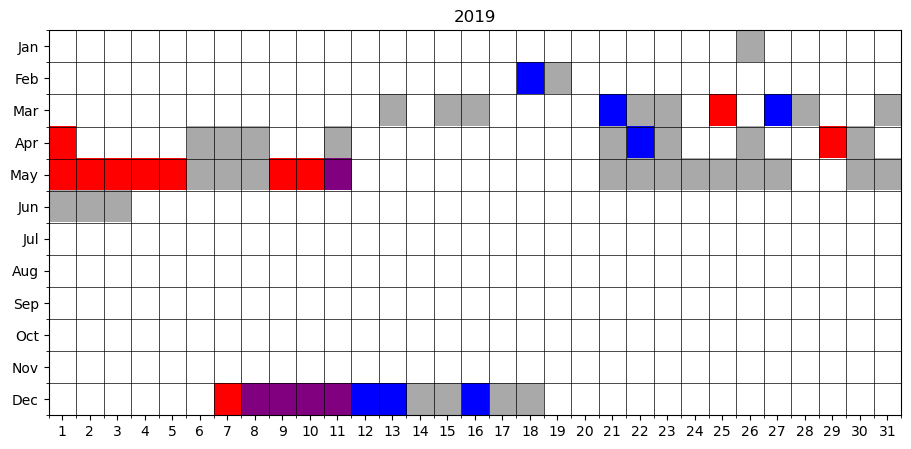

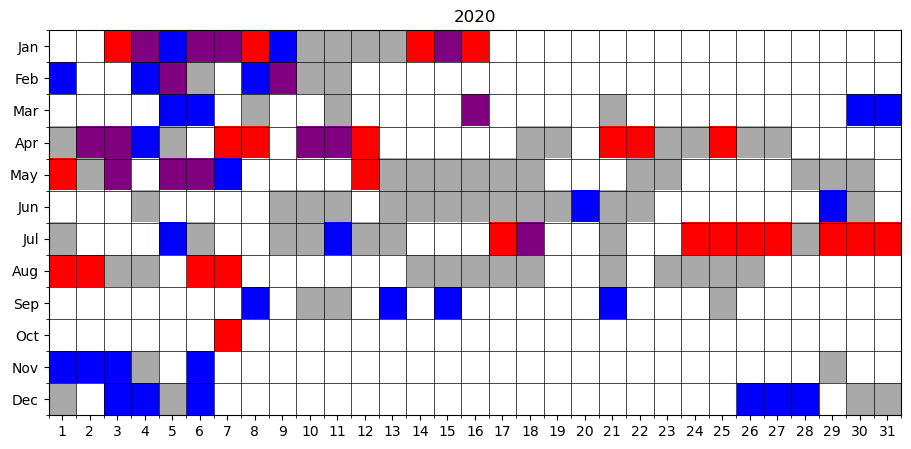

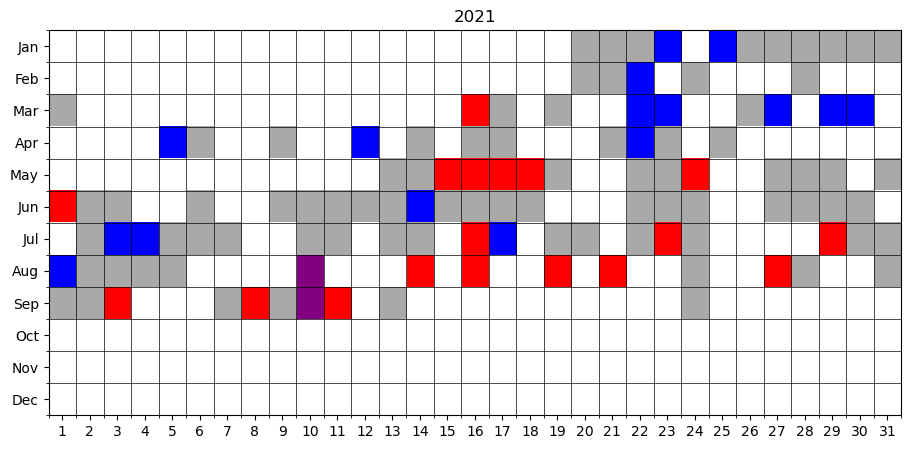

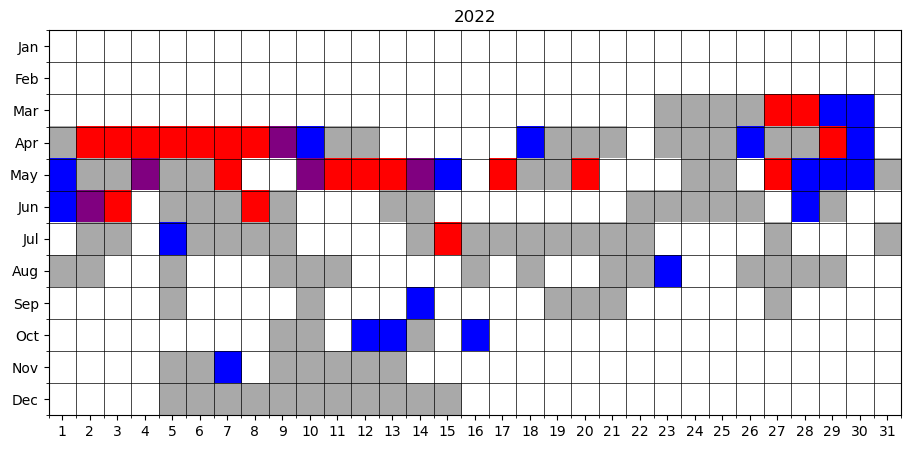

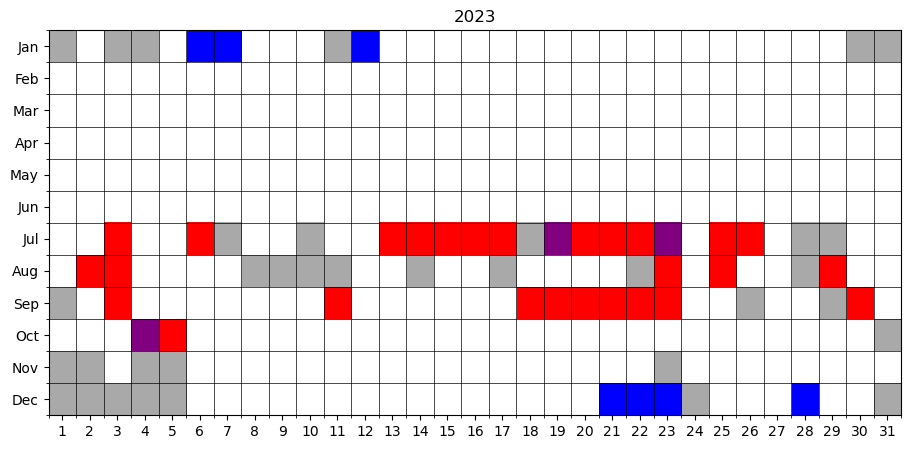

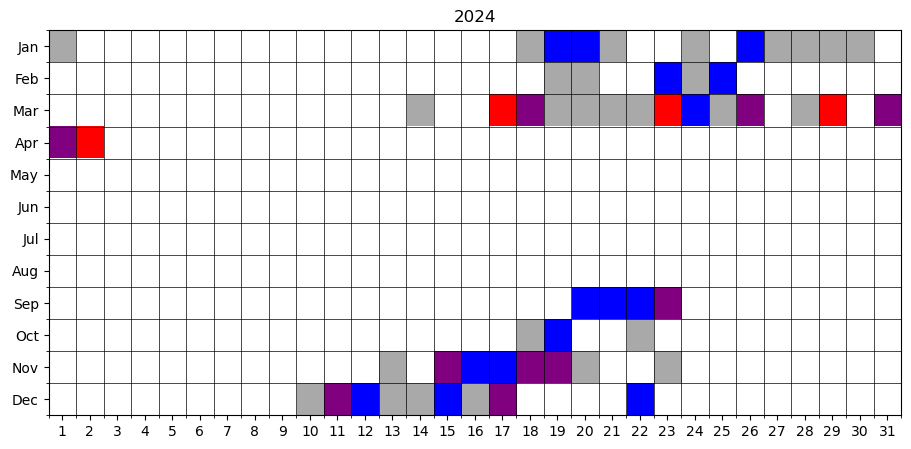

In [24]:
df_SDA_All = pd.DataFrame({'Date_(yyyy:mm:dd)': pd.to_datetime(df_SDA_Fine.tolist() + 
                                                                df_SDA_Coarse.tolist() + 
                                                                df_SDA_Mixture.tolist() + 
                                                                df_SDA_Normal.tolist() + 
                                                                df_SDA_Missing.tolist())})
df_SDA_All['Year'] = df_SDA_All['Date_(yyyy:mm:dd)'].dt.year
df_SDA_All['Month'] = df_SDA_All['Date_(yyyy:mm:dd)'].dt.month
df_SDA_All['Day'] = df_SDA_All['Date_(yyyy:mm:dd)'].dt.day

years = sorted(df_SDA_All['Year'].unique())

Fine_color = mpt.to_rgb('red')      
Coarse_color = mpt.to_rgb('blue')  
Mixture_color = mpt.to_rgb('purple') 
Normal_color = mpt.to_rgb('darkgray')   
Missing_color = mpt.to_rgb('white')

color_map = {
    'Fine': Fine_color,
    'Coarse': Coarse_color,
    'Mixture': Mixture_color,
    'Normal': Normal_color,
    'Missing': Missing_color}

for year in years:
    fig, ax = plt.subplots(figsize=(11, 5))
    grid = np.full((12, 31, 3), Missing_color, dtype=float)  

    for category, color in color_map.items():
        subset = df_SDA_All[(df_SDA_All['Year'] == year) & 
                            (df_SDA_All['Date_(yyyy:mm:dd)'].isin(eval(f"df_SDA_{category}")))]
        for _, row in subset.iterrows():
            month_idx = int(row['Month']) - 1
            day_idx = int(row['Day']) - 1
            grid[month_idx, day_idx] = color

    ax.imshow(grid, aspect="auto")
    ax.set_title(f'{year}', fontsize=12)
    ax.set_xticks(range(31))
    ax.set_xticklabels(range(1, 32))
    ax.set_yticks(range(12))
    ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_xticks(np.arange(-0.5, 31, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 12, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    plt.show()

Se pretende ahora hacer una distinción entre eventos, es decir que se pueden tener eventos finos, gruesos y mixtos tanto intensos como moderados, para ello se hará uso del AOD total, donde se establecerá un umbral (tau_a) que determina si el AOD será intenso o moderado, para ello deben haber al menos 3 medidas consecutivas del AOD total que excedan el umbral establecido. El umbral se define en la siguiente celda.

In [25]:
tau_a=0.30

Se crea un nuevo dataframe df_SDA_Turbid_4 que contiene las medidas que cumplen con el mínimo del valor de AOD total establecido.

In [26]:
df_SDA_Turbid_4 = df_SDA_Turbid_3[df_SDA_Turbid_3['Total_AOD_500nm[tau_a]'] >= tau_a]
df_SDA_Turbid_4.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
1460,2017-08-20,14:16:35,0.355336,0.351522,0.003814,Fine
1461,2017-08-20,14:26:21,0.412229,0.408002,0.004227,Fine
1462,2017-08-20,14:42:29,0.343081,0.339058,0.004023,Fine
1463,2017-08-20,14:52:15,0.366056,0.361545,0.004511,Fine
1466,2017-08-21,13:31:22,0.353518,0.325183,0.028335,Fine


Aquí se identifican las fechas que cumplen con el criterio establecido y las que no.

In [27]:
dates_with_3_Turbid = []
dates_without_3_Turbid = []

for kk in df_SDA_Turbid_4['Date_(yyyy:mm:dd)'].unique():
    indices = df_SDA_Turbid_4[df_SDA_Turbid_4['Date_(yyyy:mm:dd)'] == kk].index.tolist()
    consecutive_counts = sum((np.diff(indices) == 1).astype(int))
    
    if consecutive_counts < 2:
        if kk not in dates_without_3_Turbid:  
            dates_without_3_Turbid.append(kk)
    else:
        if kk not in dates_with_3_Turbid:  
            dates_with_3_Turbid.append(kk)

dates_with_3_Turbid = pd.to_datetime(dates_with_3_Turbid)
dates_without_3_Turbid = pd.to_datetime(dates_without_3_Turbid)

print(f'Fechas con al menos 3 mediciones consecutivas de AOD total > {tau_a} :')
print(dates_with_3_Turbid)

print(f'\nFechas con AOD total > {tau_a} pero con menos de 3 mediciones consecutivas:')
print(dates_without_3_Turbid)

Fechas con al menos 3 mediciones consecutivas de AOD total > 0.3 :
DatetimeIndex(['2017-08-20', '2018-08-05', '2018-08-13', '2020-01-06',
               '2020-01-07', '2020-04-02', '2020-05-03', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-09-21', '2021-08-21',
               '2022-04-09', '2023-09-20', '2023-09-23'],
              dtype='datetime64[ns]', freq=None)

Fechas con AOD total > 0.3 pero con menos de 3 mediciones consecutivas:
DatetimeIndex(['2017-08-21', '2018-04-04', '2019-03-25', '2019-05-11',
               '2020-02-04', '2020-04-11', '2023-12-29', '2024-04-01'],
              dtype='datetime64[ns]', freq=None)


Se crea un nuevo dataframe df_SDA_Turbid_5 que contiene las medidas de las fechas que cumplen con que hayan al menos 3 medidas consecutivas del AOD total establecido.

In [28]:
df_SDA_Turbid_5 = df_SDA_Turbid_4[df_SDA_Turbid_4['Date_(yyyy:mm:dd)'].isin(dates_with_3_Turbid)]
df_SDA_Turbid_5.head()

,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
1460,2017-08-20,14:16:35,0.355336,0.351522,0.003814,Fine
1461,2017-08-20,14:26:21,0.412229,0.408002,0.004227,Fine
1462,2017-08-20,14:42:29,0.343081,0.339058,0.004023,Fine
1463,2017-08-20,14:52:15,0.366056,0.361545,0.004511,Fine
4099,2018-08-05,11:18:49,0.311676,0.306279,0.005396,Fine


El siguiente código aplica unas condiciones para que cada fecha se agregue a una DateTime correspondiente a la naturaleza del evento (Fino Inteso, Coarse Intenso o Mixture Intenso), los arrays creados se muestran en las siguientes celdas.

In [29]:
fine_days_Turbid = []
coarse_days_Turbid = []
mixture_days_Turbid = []

for date, group in df_SDA_Turbid_5.groupby('Date_(yyyy:mm:dd)'):
    fine_indices = group[group['Classification'] == 'Fine'].index.tolist()
    coarse_indices = group[group['Classification'] == 'Coarse'].index.tolist()
    mixture_indices = group[group['Classification'] == 'Mixture'].index.tolist()

    has_fine = any(fine_indices[i+2] - fine_indices[i] <= 2 for i in range(len(fine_indices) - 2))
    has_coarse = any(coarse_indices[i+2] - coarse_indices[i] <= 2 for i in range(len(coarse_indices) - 2))
    has_mixture = any(mixture_indices[i+2] - mixture_indices[i] <= 2 for i in range(len(mixture_indices) - 2))

    if has_mixture or (has_fine and has_coarse):
        mixture_days_Turbid.append(date)
    elif has_fine:
        fine_days_Turbid.append(date)
    elif has_coarse: 
        coarse_days_Turbid.append(date)

df_SDA_Fine_Turbid = pd.to_datetime(fine_days_Turbid)
df_SDA_Coarse_Turbid = pd.to_datetime(coarse_days_Turbid)
df_SDA_Mixture_Turbid = pd.to_datetime(mixture_days_Turbid)

Se muestra el Array con los eventos identificados como turbios de la naturaleza mixto.

In [30]:
df_SDA_Mixture_Turbid

DatetimeIndex(['2020-01-06', '2020-04-02', '2020-05-03', '2022-04-09'], dtype='datetime64[ns]', freq=None)

Se muestra el Array con los eventos identificados como turbios de la naturaleza fino.

In [31]:
df_SDA_Fine_Turbid

DatetimeIndex(['2017-08-20', '2018-08-05', '2018-08-13', '2020-07-24',
               '2020-07-25', '2020-07-26', '2021-08-21', '2023-09-20',
               '2023-09-23'],
              dtype='datetime64[ns]', freq=None)

Se muestra el Array con los eventos identificados como turbios de la naturaleza coarse.

In [32]:
df_SDA_Coarse_Turbid

DatetimeIndex(['2020-01-07', '2020-09-21'], dtype='datetime64[ns]', freq=None)

Aquí se crean 3 nuevos Arrays que contienen las fechas para los días que hay un evento (fino, coarse o mixto) pero que no se ha identificado como intenso, es decir, es moderado.

In [33]:
df_SDA_Coarse_NoTurbid = df_SDA_Coarse[~df_SDA_Coarse.isin(df_SDA_Coarse_Turbid)]
df_SDA_Fine_NoTurbid = df_SDA_Fine[~df_SDA_Fine.isin(df_SDA_Fine_Turbid)]
df_SDA_Mixture_NoTurbid = df_SDA_Mixture[~df_SDA_Mixture.isin(df_SDA_Mixture_Turbid)]

In [34]:
df_SDA_Mixture_NoTurbid

DatetimeIndex(['2018-04-02', '2018-04-04', '2019-05-11', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2020-01-04',
               '2020-01-07', '2020-01-15', '2020-02-05', '2020-02-09',
               '2020-03-16', '2020-04-03', '2020-04-10', '2020-04-11',
               '2020-05-05', '2020-05-06', '2020-07-18', '2021-08-10',
               '2021-09-10', '2022-05-04', '2022-05-10', '2022-05-14',
               '2022-06-02', '2023-07-19', '2023-07-23', '2023-10-04',
               '2024-03-18', '2024-03-26', '2024-03-31', '2024-04-01',
               '2024-09-23', '2024-11-15', '2024-11-18', '2024-11-19',
               '2024-12-11', '2024-12-17'],
              dtype='datetime64[ns]', freq=None)

In [35]:
df_SDA_Fine_NoTurbid

DatetimeIndex(['2017-08-21', '2017-09-14', '2017-09-15', '2018-04-05',
               '2018-04-06', '2018-04-10', '2018-04-19', '2018-04-23',
               '2018-04-26', '2018-08-06',
               ...
               '2023-09-18', '2023-09-19', '2023-09-21', '2023-09-22',
               '2023-09-30', '2023-10-05', '2024-03-17', '2024-03-23',
               '2024-03-29', '2024-04-02'],
              dtype='datetime64[ns]', length=112, freq=None)

In [36]:
df_SDA_Coarse_NoTurbid

DatetimeIndex(['2017-06-03', '2017-10-06', '2017-10-07', '2017-11-05',
               '2017-11-06', '2017-11-08', '2017-11-09', '2018-03-03',
               '2018-05-03', '2018-06-11',
               ...
               '2024-03-24', '2024-09-20', '2024-09-21', '2024-09-22',
               '2024-10-19', '2024-11-16', '2024-11-17', '2024-12-12',
               '2024-12-15', '2024-12-22'],
              dtype='datetime64[ns]', length=107, freq=None)

Se hizo un nuevo dataframe df_SDA_Summary_Turbid que contiene un resumen del total de eventos identificados por cateogría para cada año y el número de días disponibles.

In [37]:
start_date_Turbid = df_SDA_Turbid_5['Date_(yyyy:mm:dd)'].min()
end_date_Turbid = df_SDA_Turbid_5['Date_(yyyy:mm:dd)'].max()
total_days_range_Turbid = pd.date_range(start=start_date_Turbid, end=end_date_Turbid).nunique()

years_Turbid = sorted(set(df_SDA_Turbid_5['Date_(yyyy:mm:dd)'].dt.year.unique()).union({2019,2024}))

summary_data_Turbid = {"Category": [
    "No turbidity (Gray Points)", 
    "Fine turbidity events (Red Points)", 
    "Fine moderate events (Light Red Points)", 
    "Coarse turbidity events (Blue Points)", 
    "Coarse events (Light Blue Points)", 
    "Mixture turbidity events (Purple Points)", 
    "Mixture events (Light Purple Points)", 
    "No Available Days (White Points)", 
    "Total Available Days"]}

for year in years_Turbid:
    normal_days = len(df_SDA_Normal[df_SDA_Normal.year == year])
    
    fine_days_Turbid = len(df_SDA_Fine_Turbid[df_SDA_Fine_Turbid.year == year])
    fine_days_NoTurbid = len(df_SDA_Fine_NoTurbid[df_SDA_Fine_NoTurbid.year == year])
    
    coarse_days_Turbid = len(df_SDA_Coarse_Turbid[df_SDA_Coarse_Turbid.year == year])
    coarse_days_NoTurbid = len(df_SDA_Coarse_NoTurbid[df_SDA_Coarse_NoTurbid.year == year])
    
    mixture_days_Turbid = len(df_SDA_Mixture_Turbid[df_SDA_Mixture_Turbid.year == year])
    mixture_days_NoTurbid = len(df_SDA_Mixture_NoTurbid[df_SDA_Mixture_NoTurbid.year == year])
    
    total_days_year = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31").nunique()
    total_available_days = normal_days + fine_days_Turbid + fine_days_NoTurbid + coarse_days_Turbid + coarse_days_NoTurbid + mixture_days_Turbid + mixture_days_NoTurbid
    total_no_available_days = total_days_year - total_available_days  

    summary_data_Turbid[year] = [
        normal_days, 
        fine_days_Turbid, 
        fine_days_NoTurbid, 
        coarse_days_Turbid, 
        coarse_days_NoTurbid, 
        mixture_days_Turbid, 
        mixture_days_NoTurbid, 
        total_no_available_days, 
        total_available_days]

df_SDA_Summary_Turbid = pd.DataFrame(summary_data_Turbid)
df_SDA_Summary_Turbid.set_index("Category", inplace=True)
df_SDA_Summary_Turbid

,2017,2018,2019,2020,2021,2022,2023,2024
Category,,,,,,,,
No turbidity (Gray Points),50,83,36,73,80,93,35,27
Fine turbidity events (Red Points),1,2,0,3,1,0,2,0
Fine moderate events (Light Red Points),3,10,11,22,17,20,25,4
Coarse turbidity events (Blue Points),0,0,0,2,0,0,0,0
Coarse events (Light Blue Points),7,7,7,28,16,20,7,15
Mixture turbidity events (Purple Points),0,0,0,3,0,1,0,0
Mixture events (Light Purple Points),0,2,5,12,2,4,3,10
No Available Days (White Points),304,261,306,223,249,227,293,310
Total Available Days,61,104,59,143,116,138,72,56


Los gráficos muestran los días en el eje x y los meses en el eje y, con un gráfico para cada año donde los colores representan la clasificación de los eventos de aerosoles. Los días sin datos aparecen en blanco, mientras que los días con datos pero sin eventos se muestran en gris. Los eventos de partículas finas se distinguen en rojo oscuro y rojo claro, los eventos de partículas gruesas en azul oscuro y azul claro, y los eventos de partículas mixtos en púrpura oscuro y púrpura claro, según su clasificación. 

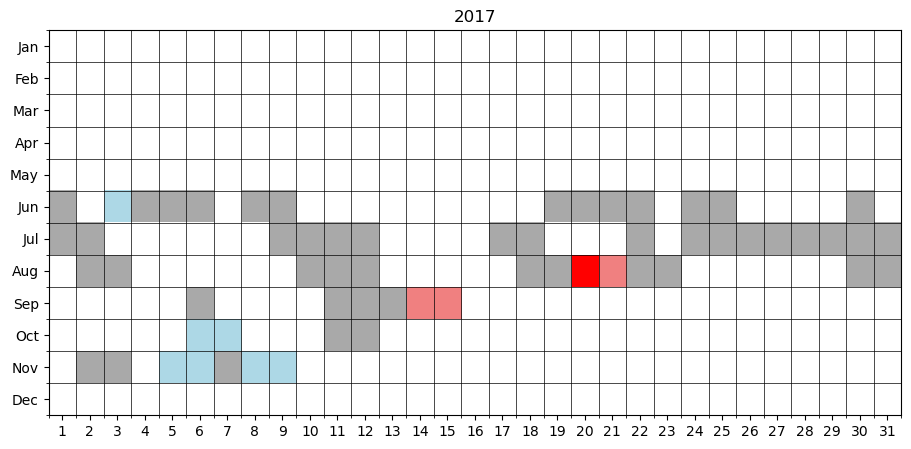

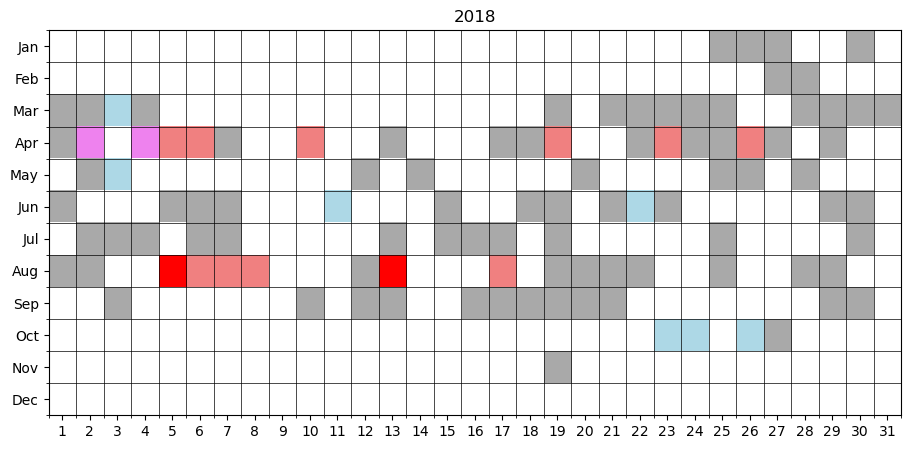

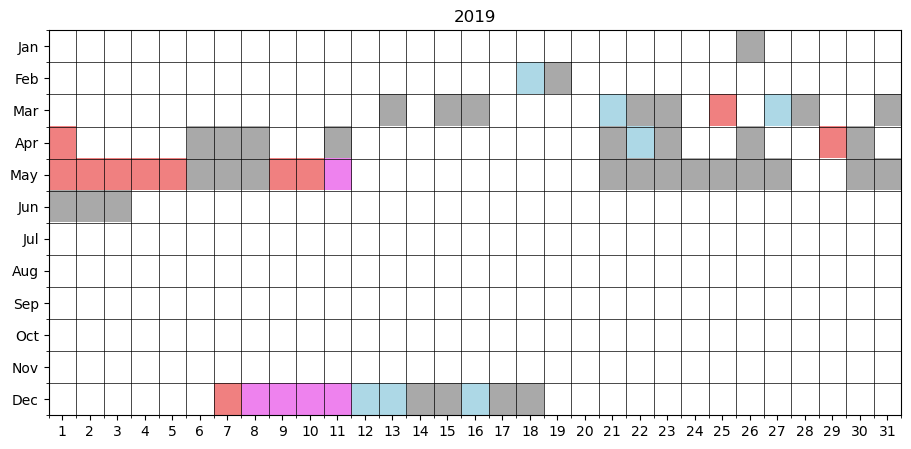

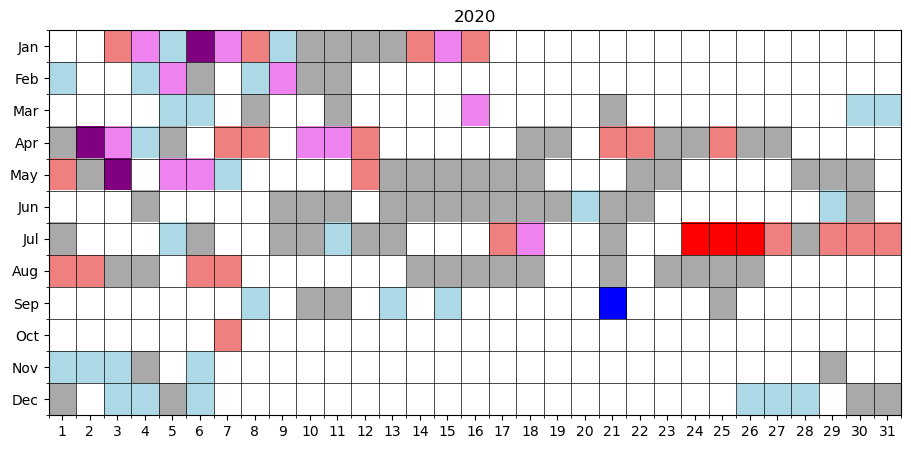

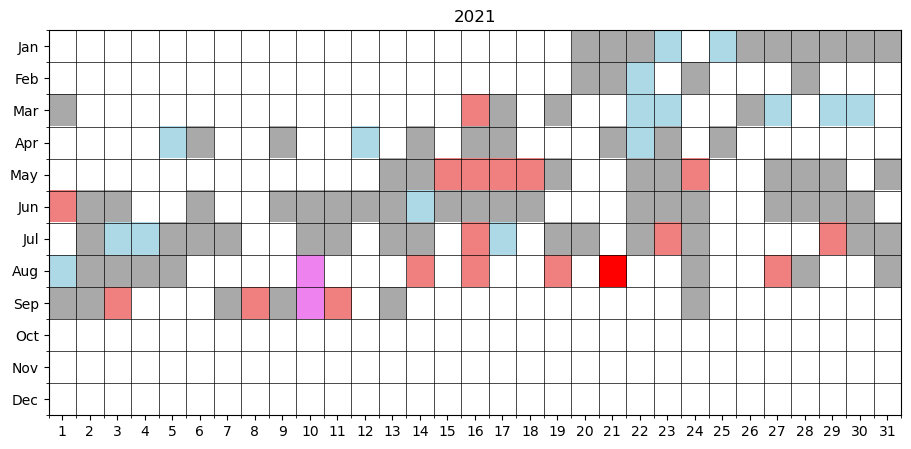

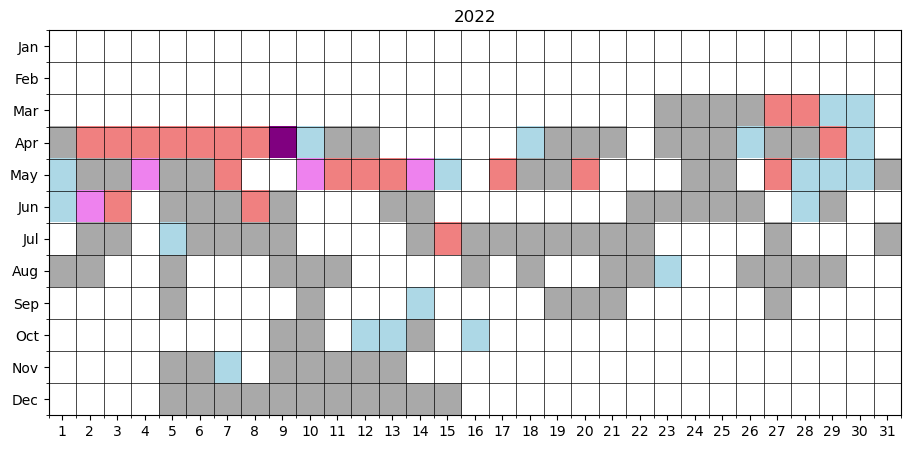

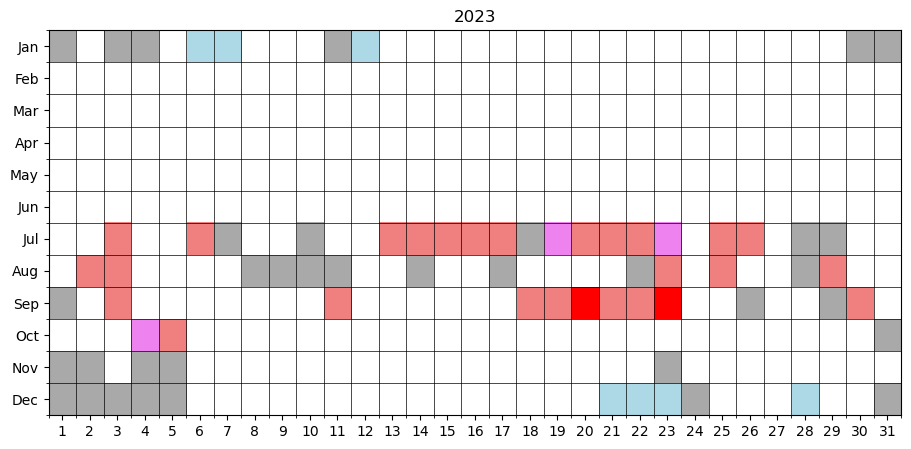

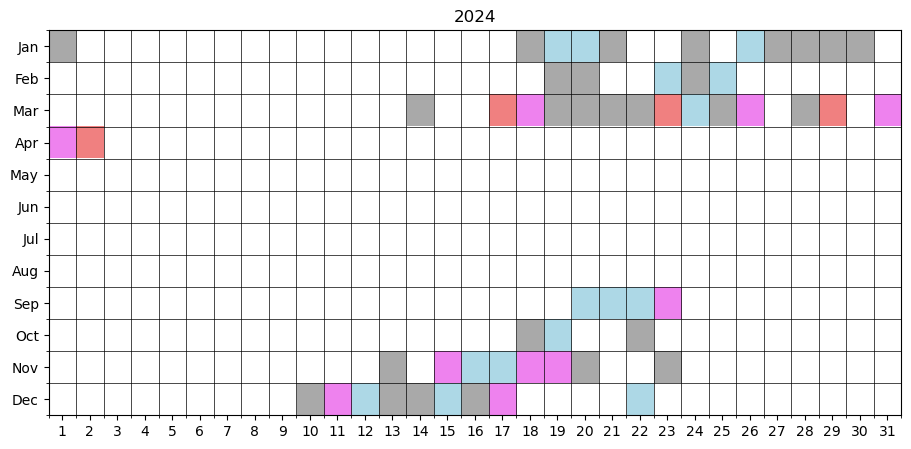

In [38]:
df_SDA_All_Turbid = pd.DataFrame({'Date_(yyyy:mm:dd)': pd.to_datetime(df_SDA_Fine_Turbid.tolist() + 
                                                                   df_SDA_Fine_NoTurbid.tolist() +
                                                                   df_SDA_Coarse_Turbid.tolist() + 
                                                                   df_SDA_Coarse_NoTurbid.tolist() + 
                                                                   df_SDA_Mixture_Turbid.tolist() + 
                                                                   df_SDA_Mixture_NoTurbid.tolist() + 
                                                                   df_SDA_Normal.tolist() + 
                                                                   df_SDA_Missing.tolist())})

df_SDA_All_Turbid['Year'] = df_SDA_All_Turbid['Date_(yyyy:mm:dd)'].dt.year
df_SDA_All_Turbid['Month'] = df_SDA_All_Turbid['Date_(yyyy:mm:dd)'].dt.month
df_SDA_All_Turbid['Day'] = df_SDA_All_Turbid['Date_(yyyy:mm:dd)'].dt.day

years_Turbid = sorted(df_SDA_All_Turbid['Year'].unique())

Fine_Turbid_color = mpt.to_rgb('red')     
Fine_Moderate_color = mpt.to_rgb('lightcoral') 
Coarse_Turbid_color = mpt.to_rgb('blue')   
Coarse_Moderate_color = mpt.to_rgb('lightblue') 
Mixture_Turbid_color = mpt.to_rgb('purple')    
Mixture_Moderate_color = mpt.to_rgb('violet')  
Normal_color = mpt.to_rgb('darkgray')          
Missing_color = mpt.to_rgb('white')           

color_map_Turbid = {
    'Fine_Turbid': Fine_Turbid_color,
    'Fine_NoTurbid': Fine_Moderate_color,
    'Coarse_Turbid': Coarse_Turbid_color,
    'Coarse_NoTurbid': Coarse_Moderate_color,
    'Mixture_Turbid': Mixture_Turbid_color,
    'Mixture_NoTurbid': Mixture_Moderate_color,
    'Normal': Normal_color,
    'Missing': Missing_color}

for year in years_Turbid:
    fig, ax = plt.subplots(figsize=(11, 5))
    grid = np.full((12, 31, 3), Missing_color, dtype=float)  

    for category, color in color_map_Turbid.items():
        subset = df_SDA_All_Turbid[(df_SDA_All_Turbid['Year'] == year) & 
                                (df_SDA_All_Turbid['Date_(yyyy:mm:dd)'].isin(eval(f"df_SDA_{category}")))]
        for _, row in subset.iterrows():
            month_idx = int(row['Month']) - 1
            day_idx = int(row['Day']) - 1
            grid[month_idx, day_idx] = color

    ax.imshow(grid, aspect="auto")
    ax.set_title(f'{year}', fontsize=12)
    ax.set_xticks(range(31))
    ax.set_xticklabels(range(1, 32))
    ax.set_yticks(range(12))
    ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_xticks(np.arange(-0.5, 31, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 12, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    plt.show()

Luego se creó un nuevo dataframe que contenía únicamente las fechas donde se identificó un evento de alta turbiedad, en el dataframe se muestra la fecha y naturaleza del evento.

In [39]:
dates_high_turbidity = []
event_types = []

for date in df_SDA_Fine_Turbid.tolist():
    dates_high_turbidity.append(date)
    event_types.append("Fine")

for date in df_SDA_Coarse_Turbid.tolist():
    dates_high_turbidity.append(date)
    event_types.append("Coarse")

for date in df_SDA_Mixture_Turbid.tolist():
    dates_high_turbidity.append(date)
    event_types.append("Mixture")

df_High_Turbidity_Events = pd.DataFrame({
    'Date_(yyyy:mm:dd)': pd.to_datetime(dates_high_turbidity),
    'Event_Turbidity_Type': event_types})

df_High_Turbidity_Events = df_High_Turbidity_Events.sort_values(by='Date_(yyyy:mm:dd)').reset_index(drop=True)
df_High_Turbidity_Events

,Date_(yyyy:mm:dd),Event_Turbidity_Type
0,2017-08-20,Fine
1,2018-08-05,Fine
2,2018-08-13,Fine
3,2020-01-06,Mixture
4,2020-01-07,Coarse
5,2020-04-02,Mixture
6,2020-05-03,Mixture
7,2020-07-24,Fine
8,2020-07-25,Fine
9,2020-07-26,Fine


Ahora vamos a cargar los datos de inversión, primeramente los del AOD tanto de Almucantar y Hybrid para después unirlos y tener un mejor espacio temporal. Empezamos con el plano almucantar en la siguiente celda.

In [40]:
df_Almucantar_AOD = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.aod', skiprows=6)
df_Almucantar_AOD.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],AOD_Extinction-Fine[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,0.0570,0.0286,0.0194,0.0160,0.0502,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,0.0719,0.0430,0.0316,0.0268,0.0597,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,0.0600,0.0321,0.0231,0.0186,0.0501,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,0.0515,0.0269,0.0187,0.0146,0.0447,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,0.0543,0.0311,0.0245,0.0211,0.0463,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas que contienen estos datos para ver la información de interés.

In [41]:
#df_Almucantar_AOD.info()

Ahora cargamos los del plano Hybrid.

In [42]:
df_Hybrid_AOD = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.aod', skiprows=6)
df_Hybrid_AOD.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],AOD_Extinction-Fine[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,0.0556,0.0285,0.0195,0.0158,0.0479,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,0.0497,0.0255,0.0179,0.0145,0.0435,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,0.0406,0.0266,0.0202,0.0173,0.0366,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,0.0485,0.0235,0.0151,0.0117,0.0452,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,0.0439,0.0213,0.0131,0.0100,0.0418,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Cambiamos el formato de los datos de la fecha, para ambos DataFrames.

In [43]:
df_Almucantar_AOD = df_Almucantar_AOD.copy()
df_Almucantar_AOD['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_AOD['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_AOD = df_Hybrid_AOD.copy()
df_Hybrid_AOD['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_AOD['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos solo la información del AOD a 440 nm ya que se trabajará incialmente a esta longitud de onda para los datos del almucantar.

In [44]:
df_Almucantar_AOD_Simplified = df_Almucantar_AOD[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                'AOD_Extinction-Total[440nm]', 
                                                #'AOD_Extinction-Fine[440nm]', 
                                                #'AOD_Extinction-Coarse[440nm]',
                                                'AOD_Extinction-Total[675nm]', 
                                                #'AOD_Extinction-Fine[675nm]', 
                                                #'AOD_Extinction-Coarse[675nm]',
                                                'AOD_Extinction-Total[870nm]', 
                                                #'AOD_Extinction-Fine[870nm]', 
                                                #'AOD_Extinction-Coarse[870nm]',
                                                'AOD_Extinction-Total[1020nm]', 
                                                #'AOD_Extinction-Fine[1020nm]', 
                                                #'AOD_Extinction-Coarse[1020nm]'
                                                ]]

df_Almucantar_AOD_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm]
0,2017-06-03,09:21:59,0.0570,0.0286,0.0194,0.0160
1,2017-06-03,10:22:05,0.0719,0.0430,0.0316,0.0268
2,2017-06-04,20:03:48,0.0600,0.0321,0.0231,0.0186
3,2017-06-05,10:22:20,0.0515,0.0269,0.0187,0.0146
4,2017-06-05,11:22:22,0.0543,0.0311,0.0245,0.0211


Extraemos la misma información pero para el Hybrid.

In [45]:
df_Hybrid_AOD_Simplified = df_Hybrid_AOD[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                'AOD_Extinction-Total[440nm]', 
                                                'AOD_Extinction-Fine[440nm]', 
                                                'AOD_Extinction-Coarse[440nm]',
                                                #'AOD_Extinction-Total[675nm]', 
                                                #'AOD_Extinction-Fine[675nm]', 
                                                #'AOD_Extinction-Coarse[675nm]',
                                                #'AOD_Extinction-Total[870nm]', 
                                                #'AOD_Extinction-Fine[870nm]', 
                                                #'AOD_Extinction-Coarse[870nm]',
                                                #'AOD_Extinction-Total[1020nm]', 
                                                #'AOD_Extinction-Fine[1020nm]', 
                                                #'AOD_Extinction-Coarse[1020nm]'
                                                ]]

df_Hybrid_AOD_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
0,2017-06-05,10:12:47,0.0556,0.0479,0.0077
1,2017-06-05,11:12:47,0.0497,0.0435,0.0062
2,2017-06-05,18:06:48,0.0406,0.0366,0.0040
3,2017-06-08,18:15:14,0.0485,0.0452,0.0034
4,2017-07-31,12:20:35,0.0439,0.0418,0.0021


Unimos los dos DataFrames para y agregamos una nueva columna (Type) que nos indica a qué plano pertenece este dato, tenemos entonces un espacio temporal mayor con la información necesaria.

In [46]:
df_Almucantar_AOD_Simplified = df_Almucantar_AOD_Simplified.copy()
df_Hybrid_AOD_Simplified = df_Hybrid_AOD_Simplified.copy()
df_Almucantar_AOD_Simplified['Type'] = 'Almucantar'
df_Hybrid_AOD_Simplified['Type'] = 'Hybrid'
df_AOD_Simplified = pd.concat([df_Almucantar_AOD_Simplified, df_Hybrid_AOD_Simplified], ignore_index=True)
df_AOD_Simplified = df_AOD_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_AOD_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
0,2017-06-03,09:21:59,0.0570,0.0286,0.0194,0.0160,Almucantar,NaN,NaN
1,2017-06-03,10:22:05,0.0719,0.0430,0.0316,0.0268,Almucantar,NaN,NaN
2,2017-06-04,20:03:48,0.0600,0.0321,0.0231,0.0186,Almucantar,NaN,NaN
3,2017-06-05,10:12:47,0.0556,NaN,NaN,NaN,Hybrid,0.0479,0.0077
4,2017-06-05,10:22:20,0.0515,0.0269,0.0187,0.0146,Almucantar,NaN,NaN


Ahora haremos lo mismo para el SSA, empezamos con el almucantar.

In [47]:
df_Almucantar_SSA = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.ssa', skiprows=6)
df_Almucantar_SSA.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Average_Solar_Zenith_Angles_for_Flux_Calculation(Degrees),...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,0.9958,0.9949,0.9944,0.9944,57.802930,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,0.9721,0.9691,0.9671,0.9667,56.776349,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,0.9935,0.9924,0.9920,0.9918,75.308574,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,0.9946,0.9935,0.9930,0.9925,56.550592,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,0.9534,0.8127,0.7012,0.6434,56.331211,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas disponibles para los datos del SSA.

In [48]:
#df_Almucantar_SSA.info()

Hacemos lo mismo con el Hybrid.

In [49]:
df_Hybrid_SSA = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.ssa', skiprows=6)
df_Hybrid_SSA.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Average_Solar_Zenith_Angles_for_Flux_Calculation(Degrees),...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,0.9949,0.9939,0.9933,0.9931,56.661547,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,0.9933,0.9915,0.9907,0.9904,56.310282,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,0.9626,0.9621,0.9615,0.9617,70.539740,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,0.9764,0.9703,0.9656,0.9631,70.615485,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,0.9083,0.8860,0.8615,0.8478,61.232475,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Pasamos el formato de la fecha a Datetime.

In [50]:
df_Almucantar_SSA = df_Almucantar_SSA.copy()
df_Almucantar_SSA['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_SSA['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_SSA = df_Hybrid_SSA.copy()
df_Hybrid_SSA['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_SSA['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos las columnas de interés para los datos de inversión del Almucantar.

In [51]:
df_Almucantar_SSA_Simplified = df_Almucantar_SSA[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                  'Single_Scattering_Albedo[440nm]',
                                                  'Single_Scattering_Albedo[675nm]',
                                                  'Single_Scattering_Albedo[870nm]',
                                                  'Single_Scattering_Albedo[1020nm]']]

df_Almucantar_SSA_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm]
0,2017-06-03,09:21:59,0.9958,0.9949,0.9944,0.9944
1,2017-06-03,10:22:05,0.9721,0.9691,0.9671,0.9667
2,2017-06-04,20:03:48,0.9935,0.9924,0.9920,0.9918
3,2017-06-05,10:22:20,0.9946,0.9935,0.9930,0.9925
4,2017-06-05,11:22:22,0.9534,0.8127,0.7012,0.6434


Extraemos las columnas de interés para los datos de inversión del Hybrid.

In [52]:
df_Hybrid_SSA_Simplified = df_Hybrid_SSA[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                  'Single_Scattering_Albedo[440nm]',
                                                  'Single_Scattering_Albedo[675nm]',
                                                  'Single_Scattering_Albedo[870nm]',
                                                  'Single_Scattering_Albedo[1020nm]']]

df_Hybrid_SSA_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm]
0,2017-06-05,10:12:47,0.9949,0.9939,0.9933,0.9931
1,2017-06-05,11:12:47,0.9933,0.9915,0.9907,0.9904
2,2017-06-05,18:06:48,0.9626,0.9621,0.9615,0.9617
3,2017-06-08,18:15:14,0.9764,0.9703,0.9656,0.9631
4,2017-07-31,12:20:35,0.9083,0.8860,0.8615,0.8478


Ahora unimos los dos DataFrames para los datos de inversión del SSA.

In [53]:
df_Almucantar_SSA_Simplified = df_Almucantar_SSA_Simplified.copy()
df_Hybrid_SSA_Simplified = df_Hybrid_SSA_Simplified.copy()
df_Almucantar_SSA_Simplified['Type'] = 'Almucantar'
df_Hybrid_SSA_Simplified['Type'] = 'Hybrid'
df_SSA_Simplified = pd.concat([df_Almucantar_SSA_Simplified, df_Hybrid_SSA_Simplified], ignore_index=True)
df_SSA_Simplified = df_SSA_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_SSA_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
0,2017-06-03,09:21:59,0.9958,0.9949,0.9944,0.9944,Almucantar
1,2017-06-03,10:22:05,0.9721,0.9691,0.9671,0.9667,Almucantar
2,2017-06-04,20:03:48,0.9935,0.9924,0.9920,0.9918,Almucantar
3,2017-06-05,10:12:47,0.9949,0.9939,0.9933,0.9931,Hybrid
4,2017-06-05,10:22:20,0.9946,0.9935,0.9930,0.9925,Almucantar


Ahora haremos lo mismo para el parámetro de asimetría (g) empezando por el almucantar.

In [54]:
df_Almucantar_ASY = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.asy', skiprows=6)
df_Almucantar_ASY.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Asymmetry_Factor-Fine[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,0.631964,0.561848,0.549118,0.556377,0.619879,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,0.659072,0.615935,0.602458,0.601101,0.633004,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,0.662593,0.591749,0.586473,0.608040,0.632432,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,0.691636,0.601867,0.575708,0.583484,0.670702,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,0.676160,0.636195,0.625090,0.633404,0.657037,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas para el parámetro de asimetría.

In [55]:
#df_Almucantar_ASY.info()

Hacemos lo mismo para el Hybrid.

In [56]:
df_Hybrid_ASY = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.asy', skiprows=6)
df_Hybrid_ASY.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Asymmetry_Factor-Fine[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,0.690932,0.615093,0.597952,0.601747,0.672140,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,0.711103,0.644142,0.628857,0.643735,0.690714,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,0.648073,0.616091,0.602922,0.599248,0.627807,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,0.673651,0.591123,0.571250,0.578885,0.665641,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,0.662639,0.580814,0.547203,0.537129,0.653408,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Cambiamos el formato de la fecha.

In [57]:
df_Almucantar_ASY = df_Almucantar_ASY.copy()
df_Almucantar_ASY['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_SSA['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_ASY = df_Hybrid_ASY.copy()
df_Hybrid_ASY['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_ASY['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos las columnas de interés para los datos del Almucantar.

In [58]:
df_Almucantar_ASY_Simplified = df_Almucantar_ASY[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                  'Asymmetry_Factor-Total[440nm]',
                                                  'Asymmetry_Factor-Total[675nm]',
                                                  'Asymmetry_Factor-Total[870nm]',
                                                  'Asymmetry_Factor-Total[1020nm]',
                                                  #'Asymmetry_Factor-Fine[440nm]',
                                                  #'Asymmetry_Factor-Fine[675nm]',
                                                  #'Asymmetry_Factor-Fine[870nm]',
                                                  #'Asymmetry_Factor-Fine[1020nm]',
                                                  #'Asymmetry_Factor-Coarse[440nm]',
                                                  #'Asymmetry_Factor-Coarse[675nm]',
                                                  #'Asymmetry_Factor-Coarse[870nm]',
                                                  #'Asymmetry_Factor-Coarse[1020nm]'
                                                 ]]

df_Almucantar_ASY_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm]
0,2017-06-03,09:21:59,0.631964,0.561848,0.549118,0.556377
1,2017-06-03,10:22:05,0.659072,0.615935,0.602458,0.601101
2,2017-06-04,20:03:48,0.662593,0.591749,0.586473,0.608040
3,2017-06-05,10:22:20,0.691636,0.601867,0.575708,0.583484
4,2017-06-05,11:22:22,0.676160,0.636195,0.625090,0.633404


Hacemos lo mismo para los datos del plano Hybrid.

In [59]:
df_Hybrid_ASY_Simplified = df_Hybrid_ASY[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                                  'Asymmetry_Factor-Total[440nm]',
                                                  'Asymmetry_Factor-Total[675nm]',
                                                  'Asymmetry_Factor-Total[870nm]',
                                                  'Asymmetry_Factor-Total[1020nm]',
                                                  #'Asymmetry_Factor-Fine[440nm]',
                                                  #'Asymmetry_Factor-Fine[675nm]',
                                                  #'Asymmetry_Factor-Fine[870nm]',
                                                  #'Asymmetry_Factor-Fine[1020nm]',
                                                  #Asymmetry_Factor-Coarse[440nm]',
                                                  #'Asymmetry_Factor-Coarse[675nm]',
                                                  #'Asymmetry_Factor-Coarse[870nm]',
                                                  #'Asymmetry_Factor-Coarse[1020nm]'
                                                 ]]

df_Hybrid_ASY_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm]
0,2017-06-05,10:12:47,0.690932,0.615093,0.597952,0.601747
1,2017-06-05,11:12:47,0.711103,0.644142,0.628857,0.643735
2,2017-06-05,18:06:48,0.648073,0.616091,0.602922,0.599248
3,2017-06-08,18:15:14,0.673651,0.591123,0.571250,0.578885
4,2017-07-31,12:20:35,0.662639,0.580814,0.547203,0.537129


Ahora unimos los dos DataFrames.

In [60]:
df_Almucantar_ASY_Simplified = df_Almucantar_ASY_Simplified.copy()
df_Hybrid_ASY_Simplified = df_Hybrid_ASY_Simplified.copy()
df_Almucantar_ASY_Simplified['Type'] = 'Almucantar'
df_Hybrid_ASY_Simplified['Type'] = 'Hybrid'
df_ASY_Simplified = pd.concat([df_Almucantar_ASY_Simplified, df_Hybrid_ASY_Simplified], ignore_index=True)
df_ASY_Simplified = df_ASY_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_ASY_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
0,2017-06-03,09:21:59,0.631964,0.561848,0.549118,0.556377,Almucantar
1,2017-06-03,10:22:05,0.659072,0.615935,0.602458,0.601101,Almucantar
2,2017-06-04,20:03:48,0.662593,0.591749,0.586473,0.608040,Almucantar
3,2017-06-05,10:12:47,0.690932,0.615093,0.597952,0.601747,Hybrid
4,2017-06-05,10:22:20,0.691636,0.601867,0.575708,0.583484,Almucantar


Ahora haremos lo mismo para la distribución de tamaño empezando por el almucantar.

In [61]:
df_Almucantar_SIZ = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.siz', skiprows=6)
df_Almucantar_SIZ.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,0.000058,0.000571,0.002480,0.004881,0.004750,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,0.000081,0.000539,0.001943,0.003901,0.004702,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,0.000175,0.002443,0.010399,0.014931,0.009704,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,0.000051,0.000706,0.003958,0.009227,0.009530,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,0.000079,0.000585,0.002221,0.004404,0.004905,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas de interés para los datos de la distribución de trabajo.

In [62]:
#df_Almucantar_SIZ.info()

Hacemos lo mismo para el Hybrid.

In [63]:
df_Hybrid_SIZ = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.siz', skiprows=6)
df_Hybrid_SIZ.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,0.000068,0.000786,0.003869,0.008313,0.008521,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,0.000041,0.000439,0.002289,0.005781,0.007128,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,0.000066,0.000310,0.000914,0.001729,0.002240,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,0.000062,0.000756,0.003616,0.007112,0.006742,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,0.000053,0.000477,0.002021,0.004128,0.004500,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Cambiamos el formato de la fecha.

In [64]:
df_Almucantar_SIZ = df_Almucantar_SIZ.copy()
df_Almucantar_SIZ['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_SIZ['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_SIZ = df_Hybrid_SIZ.copy()
df_Hybrid_SIZ['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_SIZ['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos los datos de interés para el almucantar.

In [65]:
df_Almucantar_SIZ_Simplified = df_Almucantar_SIZ[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                          '0.050000', '0.065604', '0.086077', '0.112939', '0.148184',
                                          '0.194429', '0.255105', '0.334716', '0.439173', '0.576227',
                                          '0.756052', '0.991996', '1.301571', '1.707757', '2.240702',
                                          '2.939966', '3.857452', '5.061260', '6.640745', '8.713145',
                                          '11.432287', '15.000000']]

df_Almucantar_SIZ_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.301571,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000
0,2017-06-03,09:21:59,0.000058,0.000571,0.002480,0.004881,0.004750,0.002807,0.001432,0.000911,...,0.002559,0.002174,0.001600,0.001118,0.000778,0.000535,0.000350,0.000209,0.000110,0.000051
1,2017-06-03,10:22:05,0.000081,0.000539,0.001943,0.003901,0.004702,0.003925,0.002781,0.002053,...,0.003515,0.004510,0.005620,0.006478,0.006432,0.005083,0.002986,0.001243,0.000357,0.000070
2,2017-06-04,20:03:48,0.000175,0.002443,0.010399,0.014931,0.009704,0.004522,0.002319,0.001632,...,0.003264,0.003796,0.003517,0.002539,0.001485,0.000764,0.000375,0.000187,0.000098,0.000055
3,2017-06-05,10:22:20,0.000051,0.000706,0.003958,0.009227,0.009530,0.005339,0.002436,0.001375,...,0.001530,0.001538,0.001607,0.001717,0.001753,0.001551,0.001081,0.000555,0.000202,0.000051
4,2017-06-05,11:22:22,0.000079,0.000585,0.002221,0.004404,0.004905,0.003649,0.002314,0.001594,...,0.002279,0.002374,0.002521,0.002721,0.002972,0.003038,0.002488,0.001391,0.000474,0.000094


Hacemos lo mismo para el Hybrid.

In [66]:
df_Hybrid_SIZ_Simplified = df_Hybrid_SIZ[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)', 
                                          '0.050000', '0.065604', '0.086077', '0.112939', '0.148184',
                                          '0.194429', '0.255105', '0.334716', '0.439173', '0.576227',
                                          '0.756052', '0.991996', '1.301571', '1.707757', '2.240702',
                                          '2.939966', '3.857452', '5.061260', '6.640745', '8.713145',
                                          '11.432287', '15.000000']]

df_Hybrid_SIZ_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.301571,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000
0,2017-06-05,10:12:47,0.000068,0.000786,0.003869,0.008313,0.008521,0.005156,0.002634,0.001617,...,0.002084,0.002499,0.002461,0.001919,0.001231,0.000692,0.000361,0.000182,0.000092,0.000046
1,2017-06-05,11:12:47,0.000041,0.000439,0.002289,0.005781,0.007128,0.004929,0.002686,0.001565,...,0.002552,0.002360,0.002344,0.002619,0.003489,0.004825,0.004919,0.002709,0.000696,0.000079
2,2017-06-05,18:06:48,0.000066,0.000310,0.000914,0.001729,0.002240,0.002231,0.001967,0.001727,...,0.001750,0.002037,0.002419,0.002753,0.002775,0.002296,0.001466,0.000693,0.000236,0.000058
3,2017-06-08,18:15:14,0.000062,0.000756,0.003616,0.007112,0.006742,0.004112,0.002250,0.001395,...,0.001724,0.001461,0.000963,0.000562,0.000327,0.000201,0.000132,0.000090,0.000062,0.000043
4,2017-07-31,12:20:35,0.000053,0.000477,0.002021,0.004128,0.004500,0.003153,0.001803,0.001030,...,0.000820,0.000990,0.001102,0.001110,0.001000,0.000792,0.000531,0.000290,0.000125,0.000043


Unimos los dos Dataframes.

In [67]:
df_Almucantar_SIZ_Simplified = df_Almucantar_SIZ_Simplified.copy()
df_Hybrid_SIZ_Simplified = df_Hybrid_SIZ_Simplified.copy()
df_Almucantar_SIZ_Simplified['Type'] = 'Almucantar'
df_Hybrid_SIZ_Simplified['Type'] = 'Hybrid'
df_SIZ_Simplified = pd.concat([df_Almucantar_SIZ_Simplified, df_Hybrid_SIZ_Simplified], ignore_index=True)
df_SIZ_Simplified = df_SIZ_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_SIZ_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
0,2017-06-03,09:21:59,0.000058,0.000571,0.002480,0.004881,0.004750,0.002807,0.001432,0.000911,...,0.002174,0.001600,0.001118,0.000778,0.000535,0.000350,0.000209,0.000110,0.000051,Almucantar
1,2017-06-03,10:22:05,0.000081,0.000539,0.001943,0.003901,0.004702,0.003925,0.002781,0.002053,...,0.004510,0.005620,0.006478,0.006432,0.005083,0.002986,0.001243,0.000357,0.000070,Almucantar
2,2017-06-04,20:03:48,0.000175,0.002443,0.010399,0.014931,0.009704,0.004522,0.002319,0.001632,...,0.003796,0.003517,0.002539,0.001485,0.000764,0.000375,0.000187,0.000098,0.000055,Almucantar
3,2017-06-05,10:12:47,0.000068,0.000786,0.003869,0.008313,0.008521,0.005156,0.002634,0.001617,...,0.002499,0.002461,0.001919,0.001231,0.000692,0.000361,0.000182,0.000092,0.000046,Hybrid
4,2017-06-05,10:22:20,0.000051,0.000706,0.003958,0.009227,0.009530,0.005339,0.002436,0.001375,...,0.001538,0.001607,0.001717,0.001753,0.001551,0.001081,0.000555,0.000202,0.000051,Almucantar


Haremos lo mismo para el volumen, empezando por el almucantar.

In [68]:
df_Almucantar_VOL = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.vol', skiprows=6)
df_Almucantar_VOL.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),VolC-T,REff-T,VMR-T,Std-T,VolC-F,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,0.009,0.223,0.419,1.297,0.005,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,0.018,0.399,1.025,1.412,0.006,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,0.019,0.169,0.295,1.298,0.013,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,0.013,0.193,0.346,1.369,0.009,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,0.013,0.299,0.731,1.507,0.006,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas que contiene para identificar lo que se puede extraer.

In [69]:
#df_Almucantar_VOL.info()

Hacemos lo mismo para el Hybrid.

In [70]:
df_Hybrid_VOL = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.vol', skiprows=6)
df_Hybrid_VOL.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),VolC-T,REff-T,VMR-T,Std-T,VolC-F,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,0.013,0.198,0.341,1.268,0.009,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,0.016,0.301,0.807,1.611,0.007,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,0.009,0.388,0.910,1.382,0.004,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,0.010,0.176,0.265,1.101,0.008,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,0.007,0.201,0.370,1.382,0.005,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Se cambia el formato de la fecha.

In [71]:
df_Almucantar_VOL = df_Almucantar_VOL.copy()
df_Almucantar_VOL['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_VOL['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_VOL = df_Hybrid_VOL.copy()
df_Hybrid_VOL['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_VOL['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos los datos para el volumen total, empezando por el almucantar.

In [72]:
df_Almucantar_VOL_Simplified = df_Almucantar_VOL[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)',
                                                              'VolC-T', 'VolC-F', 'VolC-C',
                                                              'REff-T', 'REff-F', 'REff-C',
                                                              #'VMR-T', 'VMR-F', 'VMR-C',
                                                              #'Std-T', 'Std-F', 'Std-C'
                                                            ]]


df_Almucantar_VOL_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C
0,2017-06-03,09:21:59,0.009,0.005,0.004,0.223,0.133,1.221
1,2017-06-03,10:22:05,0.018,0.006,0.012,0.399,0.151,1.813
2,2017-06-04,20:03:48,0.019,0.013,0.006,0.169,0.118,1.289
3,2017-06-05,10:22:20,0.013,0.009,0.004,0.193,0.135,1.442
4,2017-06-05,11:22:22,0.013,0.006,0.007,0.299,0.144,1.613


Hacemos lo mismo para el Hybrid.

In [73]:
df_Hybrid_VOL_Simplified = df_Hybrid_VOL[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)',
                                                              'VolC-T', 'VolC-F', 'VolC-C',
                                                              'REff-T', 'REff-F', 'REff-C',
                                                              #'VMR-T', 'VMR-F', 'VMR-C',
                                                              #'Std-T', 'Std-F', 'Std-C'
                                                            ]]


df_Hybrid_VOL_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C
0,2017-06-05,10:12:47,0.013,0.009,0.005,0.198,0.136,1.290
1,2017-06-05,11:12:47,0.016,0.007,0.008,0.301,0.150,2.299
2,2017-06-05,18:06:48,0.009,0.004,0.005,0.388,0.191,2.174
3,2017-06-08,18:15:14,0.010,0.008,0.002,0.176,0.138,1.254
4,2017-07-31,12:20:35,0.007,0.005,0.002,0.201,0.143,1.848


Ahora unimos los DataFrames para el volumen.

In [74]:
df_Almucantar_VOL_Simplified = df_Almucantar_VOL_Simplified.copy()
df_Hybrid_VOL_Simplified = df_Hybrid_VOL_Simplified.copy()
df_Almucantar_VOL_Simplified['Type'] = 'Almucantar'
df_Hybrid_VOL_Simplified['Type'] = 'Hybrid'
df_VOL_Simplified = pd.concat([df_Almucantar_VOL_Simplified, df_Hybrid_VOL_Simplified], ignore_index=True)
df_VOL_Simplified = df_VOL_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_VOL_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
0,2017-06-03,09:21:59,0.009,0.005,0.004,0.223,0.133,1.221,Almucantar
1,2017-06-03,10:22:05,0.018,0.006,0.012,0.399,0.151,1.813,Almucantar
2,2017-06-04,20:03:48,0.019,0.013,0.006,0.169,0.118,1.289,Almucantar
3,2017-06-05,10:12:47,0.013,0.009,0.005,0.198,0.136,1.290,Hybrid
4,2017-06-05,10:22:20,0.013,0.009,0.004,0.193,0.135,1.442,Almucantar


Ahora cargamos los datos del índice de refracción, tanto real como imaginario, empezando por el almucantar.

In [75]:
df_Almucantar_RIN = pd.read_csv('Almucantar_20170101_20241231_Ny_Alesund_AWI.rin', skiprows=6)
df_Almucantar_RIN.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,03:06:2017,09:21:59,154,154.390266,1.6000,1.6000,1.6000,1.6000,0.000502,...,0,1,10:02:2021,13:13:39,904,78.923166,11.92304,7.0,lev15,Almucantar
1,Ny_Alesund_AWI,03:06:2017,10:22:05,154,154.432002,1.6000,1.6000,1.6000,1.6000,0.002692,...,0,1,21:11:2018,17:48:57,904,78.923166,11.92304,7.0,lev15,Almucantar
2,Ny_Alesund_AWI,04:06:2017,20:03:48,155,155.835972,1.3625,1.4003,1.4253,1.4226,0.000500,...,1,1,21:11:2018,17:50:04,904,78.923166,11.92304,7.0,lev15,Almucantar
3,Ny_Alesund_AWI,05:06:2017,10:22:20,156,156.432176,1.3839,1.4192,1.4453,1.4445,0.000500,...,0,1,21:11:2018,17:49:21,904,78.923166,11.92304,7.0,lev15,Almucantar
4,Ny_Alesund_AWI,05:06:2017,11:22:22,156,156.473866,1.4957,1.4966,1.5151,1.5115,0.005217,...,0,1,21:11:2018,17:50:12,904,78.923166,11.92304,7.0,lev15,Almucantar


Revisamos las columnas para posteriormente extraer la información necesaria para hacer los gráficos.

In [76]:
#df_Almucantar_RIN.info()

Hacemos lo mismo para el Hybrid.

In [77]:
df_Hybrid_RIN = pd.read_csv('Hybrid_20170101_20241231_Ny_Alesund_AWI.rin', skiprows=6)
df_Hybrid_RIN.head()

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Ny_Alesund_AWI,05:06:2017,10:12:47,156,156.425544,1.4073,1.4274,1.4403,1.4450,0.000500,...,0,1,21:11:2018,17:49:32,904,78.923166,11.92304,7.0,lev15,Hybrid
1,Ny_Alesund_AWI,05:06:2017,11:12:47,156,156.467211,1.3981,1.4040,1.4099,1.3995,0.000500,...,0,1,21:11:2018,17:49:53,904,78.923166,11.92304,7.0,lev15,Hybrid
2,Ny_Alesund_AWI,05:06:2017,18:06:48,156,156.754722,1.6000,1.6000,1.6000,1.6000,0.003894,...,0,1,21:11:2018,17:49:17,904,78.923166,11.92304,7.0,lev15,Hybrid
3,Ny_Alesund_AWI,08:06:2017,18:15:14,159,159.760579,1.4171,1.4311,1.4324,1.4264,0.002797,...,1,1,10:02:2021,13:54:14,904,78.923166,11.92304,7.0,lev15,Hybrid
4,Ny_Alesund_AWI,31:07:2017,12:20:35,212,212.514294,1.5071,1.5120,1.5052,1.5033,0.015406,...,0,1,21:11:2018,13:27:20,904,78.923166,11.92304,7.0,lev15,Hybrid


Cambiamos el formato de la fecha para ambos dataframes.

In [78]:
df_Almucantar_RIN = df_Almucantar_RIN.copy()
df_Almucantar_RIN['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Almucantar_RIN['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

df_Hybrid_RIN = df_Hybrid_RIN.copy()
df_Hybrid_RIN['Date(yyyy:mm:dd)'] = pd.to_datetime(df_Hybrid_RIN['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

Extraemos las columnas de interés, en primer lugar para el almucantar.

In [79]:
df_Almucantar_RIN_Simplified = df_Almucantar_RIN[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)',
                                                  'Refractive_Index-Real_Part[440nm]',
                                                  'Refractive_Index-Real_Part[675nm]',
                                                  'Refractive_Index-Real_Part[870nm]',
                                                  'Refractive_Index-Real_Part[1020nm]',
                                                  'Refractive_Index-Imaginary_Part[440nm]',
                                                  'Refractive_Index-Imaginary_Part[675nm]',
                                                  'Refractive_Index-Imaginary_Part[870nm]',
                                                  'Refractive_Index-Imaginary_Part[1020nm]'
                                                            ]]


df_Almucantar_RIN_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm]
0,2017-06-03,09:21:59,1.6000,1.6000,1.6000,1.6000,0.000502,0.000503,0.000503,0.000504
1,2017-06-03,10:22:05,1.6000,1.6000,1.6000,1.6000,0.002692,0.002677,0.002668,0.002664
2,2017-06-04,20:03:48,1.3625,1.4003,1.4253,1.4226,0.000500,0.000500,0.000502,0.000503
3,2017-06-05,10:22:20,1.3839,1.4192,1.4453,1.4445,0.000500,0.000500,0.000500,0.000500
4,2017-06-05,11:22:22,1.4957,1.4966,1.5151,1.5115,0.005217,0.024715,0.046838,0.060400


Hacemos lo mismo para el Hybrid.

In [80]:
df_Hybrid_RIN_Simplified = df_Hybrid_RIN[['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)',
                                                  'Refractive_Index-Real_Part[440nm]',
                                                  'Refractive_Index-Real_Part[675nm]',
                                                  'Refractive_Index-Real_Part[870nm]',
                                                  'Refractive_Index-Real_Part[1020nm]',
                                                  'Refractive_Index-Imaginary_Part[440nm]',
                                                  'Refractive_Index-Imaginary_Part[675nm]',
                                                  'Refractive_Index-Imaginary_Part[870nm]',
                                                  'Refractive_Index-Imaginary_Part[1020nm]'
                                                            ]]


df_Hybrid_RIN_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm]
0,2017-06-05,10:12:47,1.4073,1.4274,1.4403,1.4450,0.000500,0.000500,0.000500,0.000500
1,2017-06-05,11:12:47,1.3981,1.4040,1.4099,1.3995,0.000500,0.000510,0.000517,0.000517
2,2017-06-05,18:06:48,1.6000,1.6000,1.6000,1.6000,0.003894,0.003876,0.003816,0.003789
3,2017-06-08,18:15:14,1.4171,1.4311,1.4324,1.4264,0.002797,0.002831,0.002884,0.002907
4,2017-07-31,12:20:35,1.5071,1.5120,1.5052,1.5033,0.015406,0.015193,0.015347,0.015356


Ahora unimos ambos dataframes.

In [81]:
df_Almucantar_RIN_Simplified = df_Almucantar_RIN_Simplified.copy()
df_Hybrid_RIN_Simplified = df_Hybrid_RIN_Simplified.copy()
df_Almucantar_RIN_Simplified['Type'] = 'Almucantar'
df_Hybrid_RIN_Simplified['Type'] = 'Hybrid'
df_RIN_Simplified = pd.concat([df_Almucantar_RIN_Simplified, df_Hybrid_RIN_Simplified], ignore_index=True)
df_RIN_Simplified = df_RIN_Simplified.sort_values(by=['Date(yyyy:mm:dd)', 'Time(hh:mm:ss)']).reset_index(drop=True)
df_RIN_Simplified.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
0,2017-06-03,09:21:59,1.6000,1.6000,1.6000,1.6000,0.000502,0.000503,0.000503,0.000504,Almucantar
1,2017-06-03,10:22:05,1.6000,1.6000,1.6000,1.6000,0.002692,0.002677,0.002668,0.002664,Almucantar
2,2017-06-04,20:03:48,1.3625,1.4003,1.4253,1.4226,0.000500,0.000500,0.000502,0.000503,Almucantar
3,2017-06-05,10:12:47,1.4073,1.4274,1.4403,1.4450,0.000500,0.000500,0.000500,0.000500,Hybrid
4,2017-06-05,10:22:20,1.3839,1.4192,1.4453,1.4445,0.000500,0.000500,0.000500,0.000500,Almucantar


Se crean dos listas para separar lo días que contienen datos de inversión con los que no los tienen, de esta manera disminuimos más el número de eventos que se analizarán más adelante.

In [82]:
dates_available = []
dates_Noavailable = []

for event in df_High_Turbidity_Events['Date_(yyyy:mm:dd)']:
    has_data = (
        not df_ASY_Simplified[df_ASY_Simplified['Date(yyyy:mm:dd)'] == event].empty and
        not df_AOD_Simplified[df_AOD_Simplified['Date(yyyy:mm:dd)'] == event].empty and
        not df_SSA_Simplified[df_SSA_Simplified['Date(yyyy:mm:dd)'] == event].empty and
        not df_SIZ_Simplified[df_SIZ_Simplified['Date(yyyy:mm:dd)'] == event].empty and
        not df_VOL_Simplified[df_VOL_Simplified['Date(yyyy:mm:dd)'] == event].empty and
        not df_RIN_Simplified[df_RIN_Simplified['Date(yyyy:mm:dd)'] == event].empty
    )
    if has_data:
        dates_available.append(event)
    else:
        dates_Noavailable.append(event)

df_dates_available = pd.DataFrame({'Date_(yyyy:mm:dd)': dates_available})
df_dates_Noavailable = pd.DataFrame({'Date_(yyyy:mm:dd)': dates_Noavailable})

df_dates_available = df_dates_available.merge(df_High_Turbidity_Events, on='Date_(yyyy:mm:dd)', how='left')
df_dates_Noavailable = df_dates_Noavailable.merge(df_High_Turbidity_Events, on='Date_(yyyy:mm:dd)', how='left')

print("\nDías con datos de inversión disponibles")
display(df_dates_available.reset_index(drop=True))

print("\nDías sin datos de inversión disponibles")
display(df_dates_Noavailable.reset_index(drop=True))


Días con datos de inversión disponibles


,Date_(yyyy:mm:dd),Event_Turbidity_Type
0,2018-08-05,Fine
1,2018-08-13,Fine
2,2020-05-03,Mixture
3,2020-07-24,Fine
4,2020-07-25,Fine
5,2020-07-26,Fine
6,2021-08-21,Fine



Días sin datos de inversión disponibles


,Date_(yyyy:mm:dd),Event_Turbidity_Type
0,2017-08-20,Fine
1,2020-01-06,Mixture
2,2020-01-07,Coarse
3,2020-04-02,Mixture
4,2020-09-21,Coarse
5,2022-04-09,Mixture
6,2023-09-20,Fine
7,2023-09-23,Fine


Lo siguiente que se hizo fue revisar todos los datos de las fechas identificadas como alta turbiedad y que tuvieran datos de inversión disponibles para corroborar que no hubiera errores.

In [83]:
for kk in df_dates_available['Date_(yyyy:mm:dd)']:

    print(f'\n {kk}')
    display(df_SDA_Turbid_3[df_SDA_Turbid_3['Date_(yyyy:mm:dd)'] == kk].head())


 2018-08-05 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
4093,2018-08-05,12:48:49,0.148776,0.140611,0.008165,Fine
4094,2018-08-05,12:28:36,0.242097,0.235471,0.006626,Fine
4095,2018-08-05,12:03:49,0.282066,0.276888,0.005177,Fine
4096,2018-08-05,12:18:49,0.247832,0.242212,0.005621,Fine
4097,2018-08-05,11:38:44,0.295073,0.289315,0.005758,Fine



 2018-08-13 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
4219,2018-08-13,07:00:12,0.201039,0.196650,0.004389,Fine
4220,2018-08-13,02:52:00,0.187570,0.183873,0.003696,Fine
4221,2018-08-13,06:32:25,0.194328,0.190129,0.004199,Fine
4222,2018-08-13,12:17:54,0.484643,0.477077,0.007566,Fine
4223,2018-08-13,11:47:54,0.426456,0.418945,0.007511,Fine



 2020-05-03 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
18003,2020-05-03,10:57:49,0.121819,0.075880,0.045939,Mixture
18004,2020-05-03,11:03:49,0.143154,0.073001,0.070153,Mixture
18005,2020-05-03,11:19:12,0.165693,0.070131,0.095563,Coarse
18006,2020-05-03,11:28:51,0.168912,0.068739,0.100173,Coarse
18007,2020-05-03,11:33:49,0.181171,0.070359,0.110812,Coarse



 2020-07-24 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
21696,2020-07-24,03:28:14,0.142674,0.133351,0.009323,Fine
21697,2020-07-24,02:37:14,0.218102,0.190499,0.027602,Fine
21698,2020-07-24,17:04:14,0.106436,0.099891,0.006544,Fine
21699,2020-07-24,17:01:14,0.103559,0.098014,0.005544,Fine
21700,2020-07-24,16:58:14,0.113480,0.104771,0.008709,Fine



 2020-07-25 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
21816,2020-07-25,19:52:17,0.259606,0.251374,0.008232,Fine
21817,2020-07-25,19:49:17,0.261761,0.253592,0.008169,Fine
21818,2020-07-25,19:58:17,0.253871,0.245577,0.008294,Fine
21819,2020-07-25,20:01:17,0.253164,0.245238,0.007926,Fine
21820,2020-07-25,19:45:14,0.263857,0.255559,0.008298,Fine



 2020-07-26 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
21972,2020-07-26,15:01:16,0.247361,0.241013,0.006347,Fine
21973,2020-07-26,15:16:16,0.246322,0.239933,0.006388,Fine
21974,2020-07-26,15:19:16,0.245370,0.239045,0.006324,Fine
21975,2020-07-26,15:13:16,0.244620,0.238346,0.006274,Fine
21976,2020-07-26,15:10:16,0.247633,0.241372,0.006260,Fine



 2021-08-21 00:00:00


,Date_(yyyy:mm:dd),Time_(hh:mm:ss),Total_AOD_500nm[tau_a],Fine_Mode_AOD_500nm[tau_f],Coarse_Mode_AOD_500nm[tau_c],Classification
39379,2021-08-21,13:55:27,0.325582,0.321907,0.003675,Fine
39380,2021-08-21,16:52:27,0.195006,0.191659,0.003347,Fine
39381,2021-08-21,16:49:27,0.213743,0.209006,0.004736,Fine
39382,2021-08-21,16:16:27,0.229268,0.225211,0.004057,Fine
39383,2021-08-21,13:58:27,0.338940,0.335169,0.003771,Fine


Imprimimos las fechas con los datos de inversión para cada variable, de esta manera podemos observar si se tienen suficientes datos de inversión.

In [84]:
ASY_events = {}
AOD_events = {}
SSA_events = {}
SIZ_events = {}
VOL_events = {}
RIN_events = {}

for event in df_dates_available['Date_(yyyy:mm:dd)']:
    
    ASY_events[event] = df_ASY_Simplified[df_ASY_Simplified['Date(yyyy:mm:dd)'] == event]
    AOD_events[event] = df_AOD_Simplified[df_AOD_Simplified['Date(yyyy:mm:dd)'] == event]
    SSA_events[event] = df_SSA_Simplified[df_SSA_Simplified['Date(yyyy:mm:dd)'] == event]
    SIZ_events[event] = df_SIZ_Simplified[df_SIZ_Simplified['Date(yyyy:mm:dd)'] == event]
    VOL_events[event] = df_VOL_Simplified[df_VOL_Simplified['Date(yyyy:mm:dd)'] == event]
    RIN_events[event] = df_RIN_Simplified[df_RIN_Simplified['Date(yyyy:mm:dd)'] == event]
    
    print(f'\nFecha del evento: {event}')
    print('\nAsymetry Paremeter (ASY):\n')
    display(ASY_events[event])
    print('\nAerosol Optical Depth (AOD):\n')
    display(AOD_events[event])
    print('\nSingle Scattering Albedo (SSA):\n')
    display(SSA_events[event])
    print('\nSize Distribution (SIZ):\n')
    display(SIZ_events[event])
    print('\nVolume Distribution (VOL):\n')
    display(VOL_events[event])
    print('\nRefractive Index (RIN):\n')
    display(RIN_events[event])


Fecha del evento: 2018-08-05 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
165,2018-08-05,11:30:09,0.659867,0.543400,0.466794,0.421972,Almucantar
166,2018-08-05,12:20:19,0.653418,0.531414,0.460652,0.424399,Hybrid



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
165,2018-08-05,11:30:09,0.3743,0.1659,0.094,0.0651,Almucantar,NaN,NaN
166,2018-08-05,12:20:19,0.3050,NaN,NaN,NaN,Hybrid,0.3021,0.003



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
165,2018-08-05,11:30:09,0.9969,0.996,0.9951,0.9943,Almucantar
166,2018-08-05,12:20:19,0.9967,0.996,0.9952,0.9944,Hybrid



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
165,2018-08-05,11:30:09,0.000153,0.002247,0.014168,0.038908,0.049612,0.034172,0.015852,0.006091,...,0.001774,0.001869,0.001804,0.001656,0.001482,0.001307,0.001124,0.000917,0.000690,Almucantar
166,2018-08-05,12:20:19,0.000288,0.003319,0.016907,0.038862,0.043119,0.026663,0.011909,0.005196,...,0.001557,0.001243,0.000906,0.000639,0.000460,0.000349,0.000284,0.000248,0.000233,Hybrid



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
165,2018-08-05,11:30:09,0.049,0.045,0.004,0.158,0.145,2.332,Almucantar
166,2018-08-05,12:20:19,0.044,0.041,0.003,0.146,0.138,1.624,Hybrid



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
165,2018-08-05,11:30:09,1.4839,1.5108,1.5282,1.5368,0.000514,0.000514,0.000514,0.000514,Almucantar
166,2018-08-05,12:20:19,1.4644,1.5097,1.5329,1.5377,0.000500,0.000500,0.000500,0.000500,Hybrid



Fecha del evento: 2018-08-13 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
189,2018-08-13,09:19:24,0.692684,0.640480,0.587413,0.551140,Hybrid
190,2018-08-13,09:29:14,0.701308,0.652728,0.604718,0.571192,Almucantar
191,2018-08-13,10:19:24,0.693266,0.629684,0.579661,0.548370,Hybrid
192,2018-08-13,11:29:17,0.694507,0.628718,0.576348,0.541303,Almucantar
193,2018-08-13,12:19:24,0.760082,0.704282,0.689186,0.685466,Hybrid



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
189,2018-08-13,09:19:24,0.3633,NaN,NaN,NaN,Hybrid,0.3574,0.0059
190,2018-08-13,09:29:14,0.3689,0.2154,0.1392,0.1031,Almucantar,NaN,NaN
191,2018-08-13,10:19:24,0.3721,NaN,NaN,NaN,Hybrid,0.3646,0.0075
192,2018-08-13,11:29:17,0.4419,0.2511,0.1600,0.1176,Almucantar,NaN,NaN
193,2018-08-13,12:19:24,0.5535,NaN,NaN,NaN,Hybrid,0.4620,0.0915



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
189,2018-08-13,09:19:24,0.9929,0.9932,0.9924,0.9917,Hybrid
190,2018-08-13,09:29:14,0.9818,0.9828,0.9798,0.9775,Almucantar
191,2018-08-13,10:19:24,0.9968,0.9967,0.9964,0.9961,Hybrid
192,2018-08-13,11:29:17,0.9945,0.9946,0.9940,0.9934,Almucantar
193,2018-08-13,12:19:24,0.9914,0.9899,0.9888,0.9887,Hybrid



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
189,2018-08-13,09:19:24,0.000392,0.000820,0.002072,0.006035,0.017062,0.034094,0.034800,0.018362,...,0.003150,0.002670,0.002070,0.001586,0.001254,0.001019,0.000825,0.000642,0.000473,Hybrid
190,2018-08-13,09:29:14,0.000463,0.000956,0.002389,0.006870,0.018785,0.034656,0.034272,0.022661,...,0.002953,0.002613,0.002253,0.002126,0.002229,0.002301,0.001904,0.001054,0.000361,Almucantar
191,2018-08-13,10:19:24,0.000317,0.001194,0.003901,0.010827,0.023733,0.035478,0.031828,0.018202,...,0.003991,0.002890,0.001937,0.001336,0.001006,0.000826,0.000712,0.000617,0.000525,Hybrid
192,2018-08-13,11:29:17,0.000307,0.001457,0.005294,0.014711,0.030309,0.042003,0.036987,0.022400,...,0.002865,0.002849,0.002657,0.002374,0.002027,0.001607,0.001136,0.000692,0.000357,Almucantar
193,2018-08-13,12:19:24,0.000510,0.003598,0.015068,0.037925,0.059320,0.061216,0.045275,0.026905,...,0.050233,0.103414,0.142288,0.114950,0.057716,0.020867,0.006150,0.001581,0.000363,Hybrid



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
189,2018-08-13,09:19:24,0.040,0.034,0.006,0.239,0.209,1.765,Hybrid
190,2018-08-13,09:29:14,0.045,0.039,0.006,0.245,0.215,2.461,Almucantar
191,2018-08-13,10:19:24,0.045,0.038,0.007,0.226,0.196,1.580,Hybrid
192,2018-08-13,11:29:17,0.052,0.047,0.006,0.215,0.194,2.367,Almucantar
193,2018-08-13,12:19:24,0.221,0.076,0.145,0.450,0.174,2.643,Hybrid



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
189,2018-08-13,09:19:24,1.5487,1.5425,1.5484,1.5486,0.001213,0.001159,0.001178,0.001182,Hybrid
190,2018-08-13,09:29:14,1.5157,1.5089,1.5105,1.5084,0.003084,0.002861,0.003013,0.003056,Almucantar
191,2018-08-13,10:19:24,1.5098,1.5260,1.5355,1.5351,0.000506,0.000500,0.000500,0.000500,Hybrid
192,2018-08-13,11:29:17,1.5068,1.5232,1.5320,1.5339,0.000925,0.000857,0.000854,0.000854,Almucantar
193,2018-08-13,12:19:24,1.3770,1.3829,1.3711,1.3678,0.000500,0.000500,0.000500,0.000500,Hybrid



Fecha del evento: 2020-05-03 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
428,2020-05-03,08:20:36,0.705556,0.601694,0.552464,0.537392,Almucantar
429,2020-05-03,09:20:36,0.679884,0.613723,0.567893,0.548697,Almucantar
430,2020-05-03,11:20:39,0.673823,0.683209,0.704184,0.716687,Almucantar
431,2020-05-03,12:11:16,0.669089,0.643182,0.632498,0.629496,Hybrid
432,2020-05-03,13:20:44,0.678287,0.656873,0.651629,0.650948,Almucantar
433,2020-05-03,17:31:12,0.719119,0.679154,0.664273,0.660587,Almucantar



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
428,2020-05-03,08:20:36,0.1147,0.0576,0.0378,0.0289,Almucantar,NaN,NaN
429,2020-05-03,09:20:36,0.1135,0.0577,0.0384,0.0301,Almucantar,NaN,NaN
430,2020-05-03,11:20:39,0.1951,0.1444,0.1264,0.1171,Almucantar,NaN,NaN
431,2020-05-03,12:11:16,0.1840,NaN,NaN,NaN,Hybrid,0.1342,0.0497
432,2020-05-03,13:20:44,0.2427,0.1935,0.1678,0.1547,Almucantar,NaN,NaN
433,2020-05-03,17:31:12,0.3189,0.2673,0.2480,0.2397,Almucantar,NaN,NaN



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
428,2020-05-03,08:20:36,0.9952,0.9942,0.9934,0.9929,Almucantar
429,2020-05-03,09:20:36,0.9964,0.9959,0.9954,0.9951,Almucantar
430,2020-05-03,11:20:39,0.9524,0.8377,0.7574,0.7125,Almucantar
431,2020-05-03,12:11:16,0.9666,0.9633,0.9609,0.9606,Hybrid
432,2020-05-03,13:20:44,0.9530,0.9444,0.9367,0.9336,Almucantar
433,2020-05-03,17:31:12,0.8972,0.9319,0.9515,0.9579,Almucantar



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
428,2020-05-03,08:20:36,0.000095,0.001052,0.005763,0.015583,0.021011,0.015135,0.007456,0.003698,...,0.003292,0.002889,0.002279,0.001703,0.001189,0.000754,0.000428,0.000215,0.000096,Almucantar
429,2020-05-03,09:20:36,0.000048,0.000269,0.001219,0.004198,0.009158,0.010138,0.005954,0.002868,...,0.002777,0.002222,0.001792,0.001504,0.001234,0.000904,0.000552,0.000271,0.000105,Almucantar
430,2020-05-03,11:20:39,0.000531,0.002384,0.006001,0.008863,0.008685,0.007081,0.006400,0.007850,...,0.013467,0.022361,0.034702,0.047722,0.054536,0.044091,0.020393,0.004727,0.000523,Almucantar
431,2020-05-03,12:11:16,0.000353,0.001206,0.003032,0.005649,0.007987,0.008999,0.008733,0.008115,...,0.017404,0.022047,0.027059,0.029373,0.025315,0.015827,0.006764,0.001918,0.000358,Hybrid
432,2020-05-03,13:20:44,0.000523,0.001664,0.003841,0.006543,0.008668,0.009807,0.010637,0.012034,...,0.024367,0.032370,0.042972,0.050803,0.047151,0.030712,0.012934,0.003362,0.000530,Almucantar
433,2020-05-03,17:31:12,0.000847,0.002782,0.005976,0.008661,0.009293,0.008679,0.008555,0.010196,...,0.061837,0.079558,0.099746,0.107370,0.087356,0.049119,0.018192,0.004352,0.000669,Almucantar



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
428,2020-05-03,08:20:36,0.026,0.020,0.006,0.188,0.149,1.509,Almucantar
429,2020-05-03,09:20:36,0.015,0.010,0.005,0.255,0.175,1.504,Almucantar
430,2020-05-03,11:20:39,0.094,0.025,0.069,0.715,0.220,3.480,Almucantar
431,2020-05-03,12:11:16,0.066,0.013,0.053,0.632,0.173,1.844,Hybrid
432,2020-05-03,13:20:44,0.105,0.017,0.088,0.748,0.178,1.870,Almucantar
433,2020-05-03,17:31:12,0.197,0.017,0.180,0.987,0.158,1.941,Almucantar



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
428,2020-05-03,08:20:36,1.3710,1.4032,1.4251,1.4316,0.000501,0.000500,0.000501,0.000502,Almucantar
429,2020-05-03,09:20:36,1.5750,1.5512,1.5618,1.5664,0.000500,0.000500,0.000500,0.000500,Almucantar
430,2020-05-03,11:20:39,1.5846,1.5735,1.5782,1.5802,0.002728,0.015515,0.033863,0.047715,Almucantar
431,2020-05-03,12:11:16,1.6000,1.6000,1.6000,1.6000,0.002183,0.002667,0.002952,0.003071,Hybrid
432,2020-05-03,13:20:44,1.6000,1.6000,1.6000,1.6000,0.002814,0.003879,0.004970,0.005503,Almucantar
433,2020-05-03,17:31:12,1.6000,1.6000,1.6000,1.6000,0.005135,0.003420,0.002672,0.002514,Almucantar



Fecha del evento: 2020-07-24 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
507,2020-07-24,10:30:02,0.685087,0.619008,0.577382,0.558655,Almucantar
508,2020-07-24,11:20:45,0.726425,0.638302,0.589400,0.567168,Hybrid



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
507,2020-07-24,10:30:02,0.1564,0.0802,0.0556,0.0447,Almucantar,NaN,NaN
508,2020-07-24,11:20:45,0.1680,NaN,NaN,NaN,Hybrid,0.1613,0.0067



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
507,2020-07-24,10:30:02,0.9233,0.9084,0.8761,0.8676,Almucantar
508,2020-07-24,11:20:45,0.9864,0.9841,0.9819,0.9802,Hybrid



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
507,2020-07-24,10:30:02,0.000129,0.000819,0.003325,0.008565,0.013719,0.013329,0.008250,0.004049,...,0.004261,0.005131,0.006193,0.007340,0.007814,0.006360,0.003411,0.001104,0.000208,Almucantar
508,2020-07-24,11:20:45,0.000149,0.001787,0.009174,0.021107,0.025197,0.020319,0.014613,0.009694,...,0.003720,0.004758,0.005395,0.005366,0.004474,0.002884,0.001372,0.000477,0.000121,Hybrid



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
507,2020-07-24,10:30:02,0.029,0.015,0.014,0.296,0.163,2.231,Almucantar
508,2020-07-24,11:20:45,0.040,0.030,0.009,0.203,0.158,2.351,Hybrid



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
507,2020-07-24,10:30:02,1.5260,1.5157,1.5359,1.5482,0.012399,0.011654,0.014598,0.014702,Almucantar
508,2020-07-24,11:20:45,1.3601,1.3850,1.4051,1.4115,0.001429,0.001370,0.001377,0.001378,Hybrid



Fecha del evento: 2020-07-25 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
509,2020-07-25,09:30:06,0.763000,0.672438,0.599510,0.550898,Almucantar
510,2020-07-25,19:05:29,0.696989,0.637195,0.578239,0.539732,Almucantar



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
509,2020-07-25,09:30:06,0.2347,0.1117,0.0666,0.0470,Almucantar,NaN,NaN
510,2020-07-25,19:05:29,0.3568,0.1687,0.1015,0.0726,Almucantar,NaN,NaN



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
509,2020-07-25,09:30:06,0.9616,0.9553,0.9452,0.9364,Almucantar
510,2020-07-25,19:05:29,0.9690,0.9652,0.9588,0.9535,Almucantar



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
509,2020-07-25,09:30:06,0.000232,0.000685,0.002125,0.006728,0.019280,0.037461,0.033129,0.013606,...,0.002493,0.003303,0.003502,0.003076,0.002377,0.001651,0.001013,0.000534,0.000239,Almucantar
510,2020-07-25,19:05:29,0.000406,0.001376,0.003831,0.009774,0.023585,0.039594,0.029139,0.012370,...,0.003509,0.004334,0.004239,0.003670,0.003242,0.002853,0.002066,0.000993,0.000285,Almucantar



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
509,2020-07-25,09:30:06,0.039,0.033,0.006,0.231,0.201,2.649,Almucantar
510,2020-07-25,19:05:29,0.044,0.036,0.008,0.228,0.190,2.660,Almucantar



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
509,2020-07-25,09:30:06,1.3765,1.3773,1.3794,1.3762,0.005684,0.005219,0.005199,0.005201,Almucantar
510,2020-07-25,19:05:29,1.5150,1.4781,1.4760,1.4711,0.005520,0.005085,0.005004,0.004967,Almucantar



Fecha del evento: 2020-07-26 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
511,2020-07-26,10:20:43,0.720759,0.649750,0.583116,0.538708,Hybrid
512,2020-07-26,10:30:08,0.718831,0.661300,0.595184,0.548774,Almucantar
513,2020-07-26,11:20:43,0.723190,0.663123,0.597889,0.551994,Hybrid
514,2020-07-26,11:30:15,0.726677,0.664636,0.599509,0.554644,Almucantar
515,2020-07-26,12:20:43,0.747333,0.680771,0.617454,0.575056,Hybrid
516,2020-07-26,12:30:03,0.736593,0.681352,0.620569,0.579177,Almucantar
517,2020-07-26,13:20:42,0.745901,0.709498,0.656152,0.619258,Hybrid
518,2020-07-26,13:30:05,0.739039,0.699625,0.645548,0.607917,Almucantar
519,2020-07-26,14:20:43,0.730297,0.686008,0.627392,0.586728,Hybrid
520,2020-07-26,14:30:07,0.733952,0.676399,0.618626,0.579408,Almucantar



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
511,2020-07-26,10:20:43,0.2777,NaN,NaN,NaN,Hybrid,0.2726,0.0051
512,2020-07-26,10:30:08,0.2797,0.1319,0.0779,0.0553,Almucantar,NaN,NaN
513,2020-07-26,11:20:43,0.2876,NaN,NaN,NaN,Hybrid,0.2823,0.0053
514,2020-07-26,11:30:15,0.2809,0.1331,0.0787,0.0555,Almucantar,NaN,NaN
515,2020-07-26,12:20:43,0.2918,NaN,NaN,NaN,Hybrid,0.2854,0.0064
516,2020-07-26,12:30:03,0.2978,0.1449,0.0869,0.0619,Almucantar,NaN,NaN
517,2020-07-26,13:20:42,0.3407,NaN,NaN,NaN,Hybrid,0.3327,0.0080
518,2020-07-26,13:30:05,0.3604,0.1794,0.1083,0.0777,Almucantar,NaN,NaN
519,2020-07-26,14:20:43,0.3279,NaN,NaN,NaN,Hybrid,0.3209,0.0070
520,2020-07-26,14:30:07,0.3172,0.1554,0.0940,0.0672,Almucantar,NaN,NaN



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
511,2020-07-26,10:20:43,0.9671,0.9624,0.9546,0.9478,Hybrid
512,2020-07-26,10:30:08,0.9507,0.9451,0.9324,0.9224,Almucantar
513,2020-07-26,11:20:43,0.9407,0.9355,0.9234,0.9146,Hybrid
514,2020-07-26,11:30:15,0.9483,0.9460,0.9339,0.9236,Almucantar
515,2020-07-26,12:20:43,0.9550,0.9517,0.9420,0.9338,Hybrid
516,2020-07-26,12:30:03,0.9534,0.9496,0.9383,0.9293,Almucantar
517,2020-07-26,13:20:42,0.9355,0.9231,0.9053,0.8911,Hybrid
518,2020-07-26,13:30:05,0.9226,0.8979,0.8696,0.8498,Almucantar
519,2020-07-26,14:20:43,0.9366,0.9277,0.9132,0.9024,Hybrid
520,2020-07-26,14:30:07,0.9423,0.9370,0.9177,0.9053,Almucantar



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
511,2020-07-26,10:20:43,0.000254,0.000588,0.001683,0.005635,0.017880,0.034756,0.027323,0.010729,...,0.003320,0.003451,0.003057,0.002447,0.001835,0.001304,0.000868,0.000529,0.000292,Hybrid
512,2020-07-26,10:30:08,0.000231,0.000387,0.000975,0.003424,0.012995,0.032327,0.030270,0.011307,...,0.003995,0.003785,0.002983,0.002181,0.001550,0.001076,0.000717,0.000450,0.000263,Almucantar
513,2020-07-26,11:20:43,0.000482,0.000690,0.001466,0.004376,0.014592,0.033239,0.030559,0.012862,...,0.003544,0.003586,0.003132,0.002482,0.001829,0.001275,0.000849,0.000538,0.000321,Hybrid
514,2020-07-26,11:30:15,0.000516,0.000626,0.001244,0.003794,0.013614,0.033420,0.031250,0.012103,...,0.003823,0.003788,0.003023,0.002227,0.001667,0.001277,0.000938,0.000607,0.000332,Almucantar
515,2020-07-26,12:20:43,0.000497,0.000663,0.001335,0.003899,0.013529,0.035032,0.037777,0.016351,...,0.004322,0.004253,0.003506,0.002597,0.001843,0.001290,0.000874,0.000552,0.000317,Hybrid
516,2020-07-26,12:30:03,0.000606,0.000679,0.001235,0.003459,0.011985,0.032020,0.037232,0.017105,...,0.003884,0.004062,0.003662,0.002973,0.002249,0.001616,0.001100,0.000699,0.000407,Almucantar
517,2020-07-26,13:20:42,0.000146,0.000313,0.000869,0.002973,0.010676,0.029946,0.044423,0.027389,...,0.004944,0.004910,0.004247,0.003414,0.002631,0.001921,0.001281,0.000749,0.000377,Hybrid
518,2020-07-26,13:30:05,0.000395,0.000711,0.001599,0.004373,0.012961,0.032245,0.045349,0.026338,...,0.003594,0.003802,0.004069,0.004170,0.003794,0.002862,0.001714,0.000799,0.000288,Almucantar
519,2020-07-26,14:20:43,0.000661,0.000791,0.001431,0.003775,0.012139,0.031856,0.040117,0.020221,...,0.004045,0.004460,0.004176,0.003419,0.002597,0.001870,0.001242,0.000730,0.000370,Hybrid
520,2020-07-26,14:30:07,0.000377,0.001204,0.003085,0.007037,0.016036,0.032773,0.037662,0.018035,...,0.004346,0.004065,0.003291,0.002717,0.002442,0.002198,0.001661,0.000888,0.000309,Almucantar



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
511,2020-07-26,10:20:43,0.035,0.029,0.006,0.235,0.197,2.053,Hybrid
512,2020-07-26,10:30:08,0.033,0.027,0.006,0.251,0.208,1.967,Almucantar
513,2020-07-26,11:20:43,0.035,0.029,0.006,0.243,0.203,2.033,Hybrid
514,2020-07-26,11:30:15,0.035,0.028,0.006,0.246,0.206,2.027,Almucantar
515,2020-07-26,12:20:43,0.040,0.032,0.007,0.255,0.213,1.943,Hybrid
516,2020-07-26,12:30:03,0.038,0.031,0.008,0.261,0.215,2.027,Almucantar
517,2020-07-26,13:20:42,0.045,0.036,0.009,0.289,0.238,1.961,Hybrid
518,2020-07-26,13:30:05,0.047,0.038,0.009,0.274,0.226,2.072,Almucantar
519,2020-07-26,14:20:43,0.041,0.033,0.008,0.265,0.218,2.041,Hybrid
520,2020-07-26,14:30:07,0.043,0.035,0.008,0.245,0.204,2.077,Almucantar



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
511,2020-07-26,10:20:43,1.4785,1.4516,1.4496,1.4443,0.005769,0.005335,0.005299,0.005299,Hybrid
512,2020-07-26,10:30:08,1.5089,1.4570,1.4489,1.4427,0.009312,0.008422,0.008431,0.008432,Almucantar
513,2020-07-26,11:20:43,1.4966,1.4493,1.4415,1.4383,0.011443,0.009597,0.009325,0.009157,Hybrid
514,2020-07-26,11:30:15,1.4888,1.4458,1.4382,1.4299,0.009511,0.008062,0.008034,0.008045,Almucantar
515,2020-07-26,12:20:43,1.4456,1.4169,1.4116,1.4049,0.007865,0.006642,0.006539,0.006518,Hybrid
516,2020-07-26,12:30:03,1.4747,1.4310,1.4224,1.4143,0.008368,0.007359,0.007387,0.007380,Almucantar
517,2020-07-26,13:20:42,1.4736,1.4073,1.3924,1.3811,0.011595,0.011469,0.011657,0.011711,Hybrid
518,2020-07-26,13:30:05,1.4854,1.4216,1.4038,1.3914,0.014466,0.015792,0.016864,0.016975,Almucantar
519,2020-07-26,14:20:43,1.4965,1.4367,1.4266,1.4196,0.011931,0.011154,0.011056,0.010892,Hybrid
520,2020-07-26,14:30:07,1.4661,1.4299,1.4218,1.4135,0.010173,0.009040,0.009663,0.009721,Almucantar



Fecha del evento: 2021-08-21 00:00:00

Asymetry Paremeter (ASY):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
858,2021-08-21,12:27:04,0.694730,0.644727,0.598810,0.564796,Almucantar
859,2021-08-21,13:17:53,0.685158,0.635915,0.587278,0.550380,Hybrid
860,2021-08-21,13:27:01,0.695374,0.642356,0.594205,0.557610,Almucantar



Aerosol Optical Depth (AOD):



,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
858,2021-08-21,12:27:04,0.3284,0.2138,0.1420,0.1047,Almucantar,NaN,NaN
859,2021-08-21,13:17:53,0.3236,NaN,NaN,NaN,Hybrid,0.3232,0.0004
860,2021-08-21,13:27:01,0.3324,0.2139,0.1402,0.1013,Almucantar,NaN,NaN



Single Scattering Albedo (SSA):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
858,2021-08-21,12:27:04,0.9968,0.9970,0.9967,0.9964,Almucantar
859,2021-08-21,13:17:53,0.9971,0.9975,0.9973,0.9971,Hybrid
860,2021-08-21,13:27:01,0.9960,0.9965,0.9962,0.9958,Almucantar



Size Distribution (SIZ):



,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
858,2021-08-21,12:27:04,0.000235,0.000717,0.002092,0.005725,0.013828,0.026395,0.033861,0.023921,...,0.001800,0.003070,0.004412,0.004859,0.004109,0.002774,0.001547,0.000724,0.000286,Almucantar
859,2021-08-21,13:17:53,0.000244,0.000760,0.002212,0.005922,0.013858,0.025611,0.031773,0.021849,...,0.000119,0.000127,0.000165,0.000234,0.000327,0.000416,0.000459,0.000425,0.000327,Hybrid
860,2021-08-21,13:27:01,0.000231,0.000873,0.002744,0.007127,0.015178,0.026198,0.034158,0.025606,...,0.000384,0.000443,0.000504,0.000536,0.000532,0.000498,0.000443,0.000375,0.000301,Almucantar



Volume Distribution (VOL):



,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
858,2021-08-21,12:27:04,0.040,0.033,0.007,0.260,0.218,3.152,Almucantar
859,2021-08-21,13:17:53,0.032,0.031,0.001,0.218,0.213,3.920,Hybrid
860,2021-08-21,13:27:01,0.035,0.034,0.001,0.220,0.212,3.016,Almucantar



Refractive Index (RIN):



,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
858,2021-08-21,12:27:04,1.5325,1.5537,1.5598,1.5586,0.000507,0.000500,0.000500,0.000500,Almucantar
859,2021-08-21,13:17:53,1.5700,1.5854,1.5916,1.5900,0.000520,0.000510,0.000509,0.000509,Hybrid
860,2021-08-21,13:27:01,1.5238,1.5492,1.5557,1.5527,0.000725,0.000686,0.000691,0.000694,Almucantar


Creamos una leyenda explicando los nuevos patches.

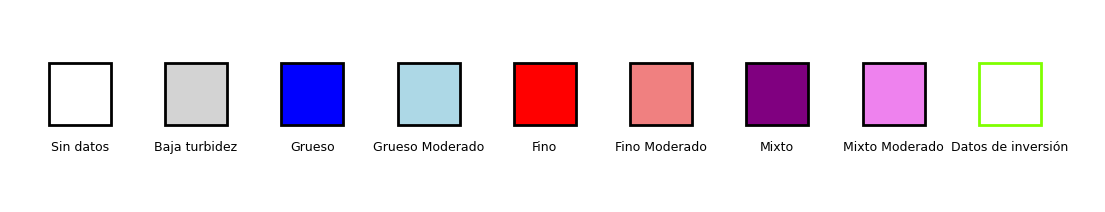

In [85]:
fig, ax = plt.subplots(figsize=(14, 2.5))

colors = ['white', 'lightgrey', 'blue', 'lightblue', 'red', 'lightcoral', 'purple', 'violet', 'white']
labels = ['Sin datos', 'Baja turbidez', 'Grueso', 'Grueso Moderado', 'Fino', 'Fino Moderado', 'Mixto', 'Mixto Moderado', 'Datos de inversión']
edge_colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'chartreuse']

spacing = 1.5

for i, (color, label, edge) in enumerate(zip(colors, labels, edge_colors)):
    x = i * spacing
    rect = patches.Rectangle((x, 0), 0.8, 0.8, facecolor=color, edgecolor=edge, linewidth=2)
    ax.add_patch(rect)
    ax.text(x + 0.4, -0.2, label, ha='center', va='top', fontsize=9)

ax.set_xlim(-0.5, spacing * len(colors))
ax.set_ylim(-1, 1.5)
ax.axis('off')

plt.savefig('eventos_turbidez_leyenda.png', dpi=300, bbox_inches='tight')
plt.show()

Marcamos estos eventos con datos de inversión disponibles para identificarlos en los gráficos, estos serán los que posteriormente se trabajarán. 

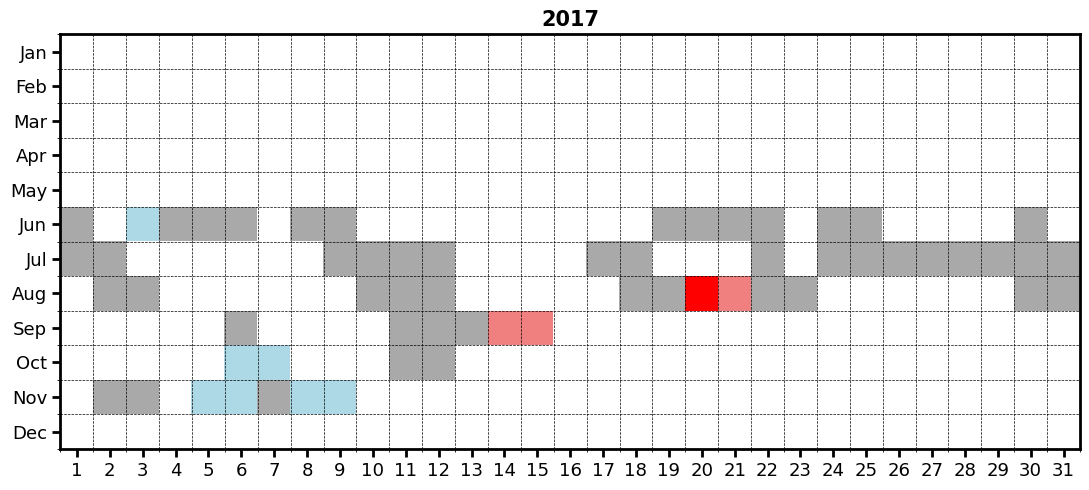

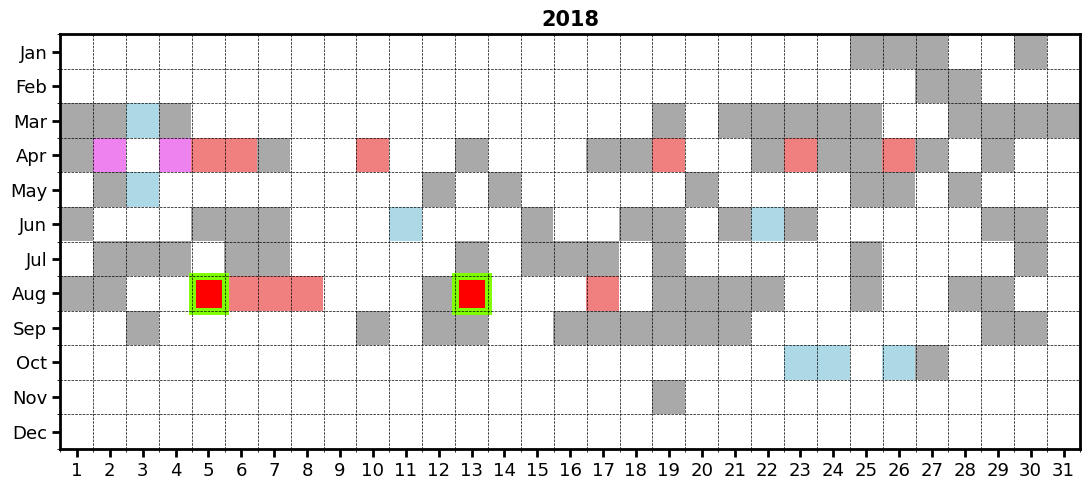

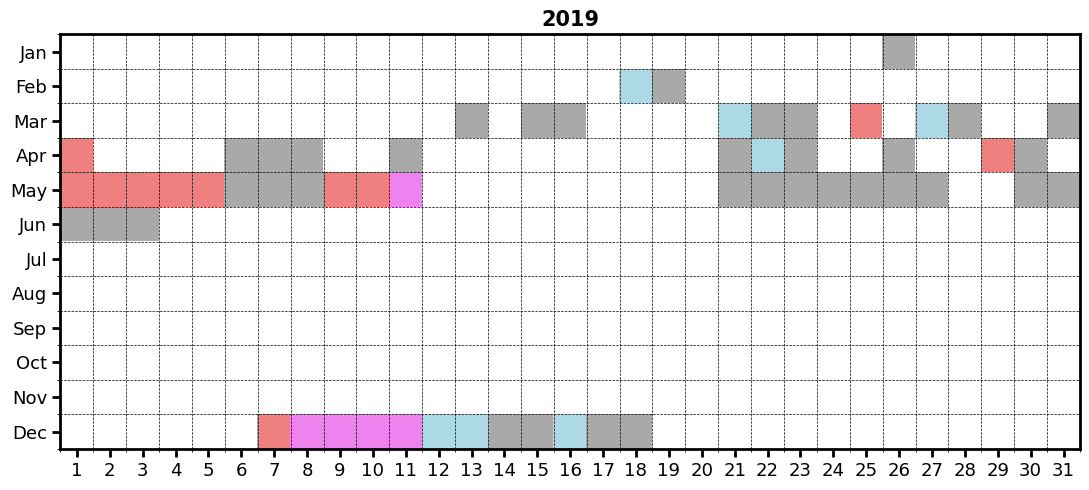

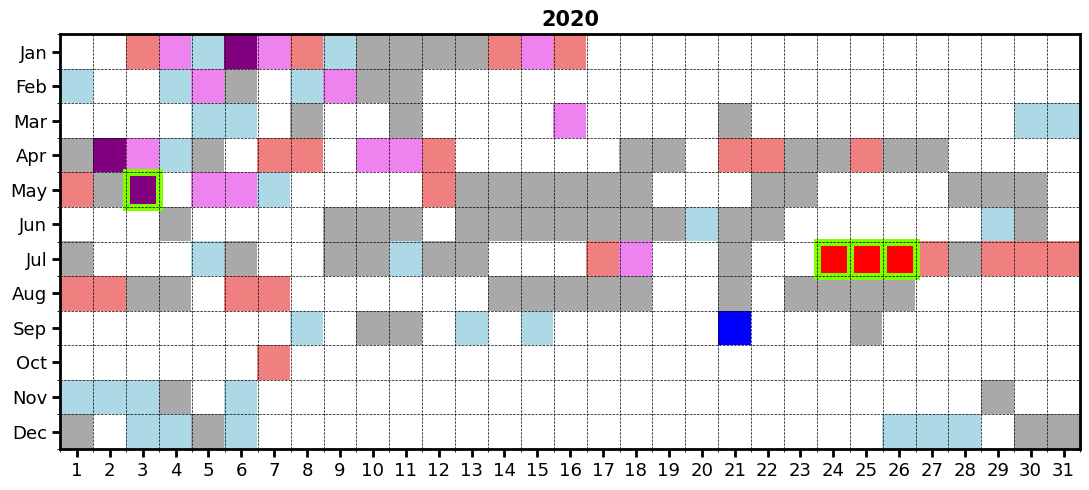

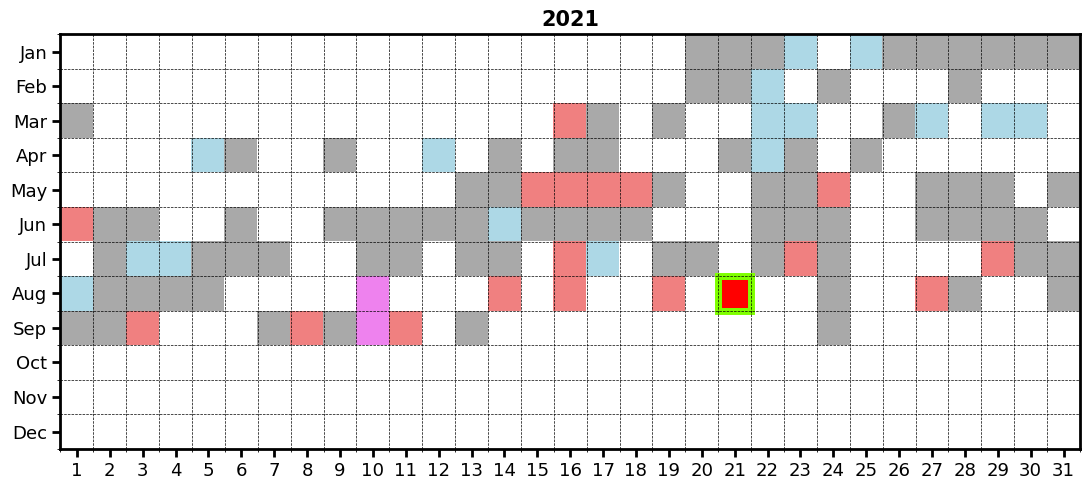

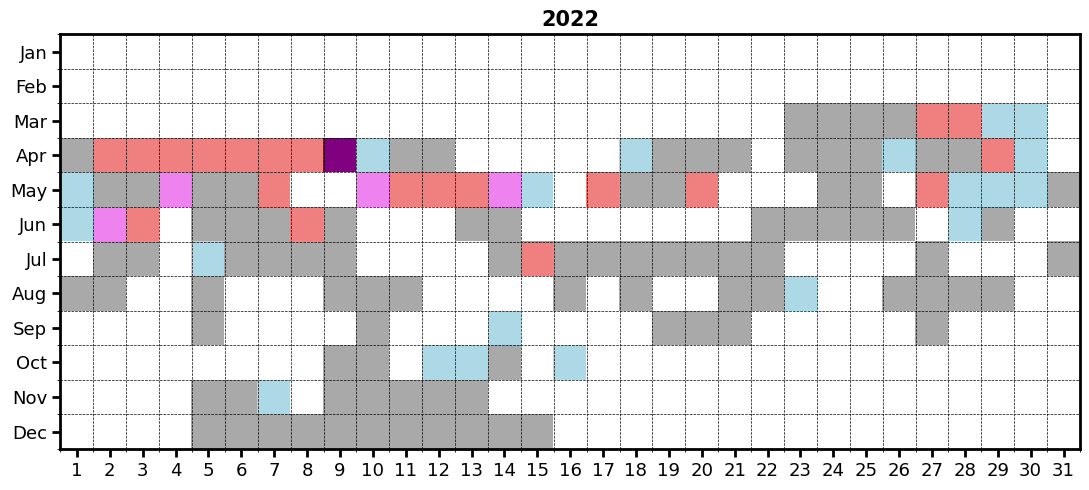

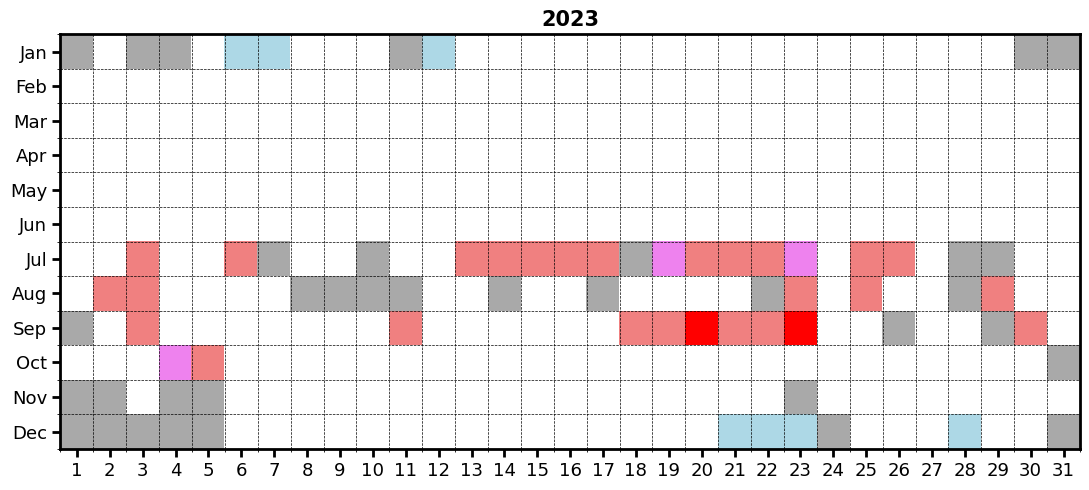

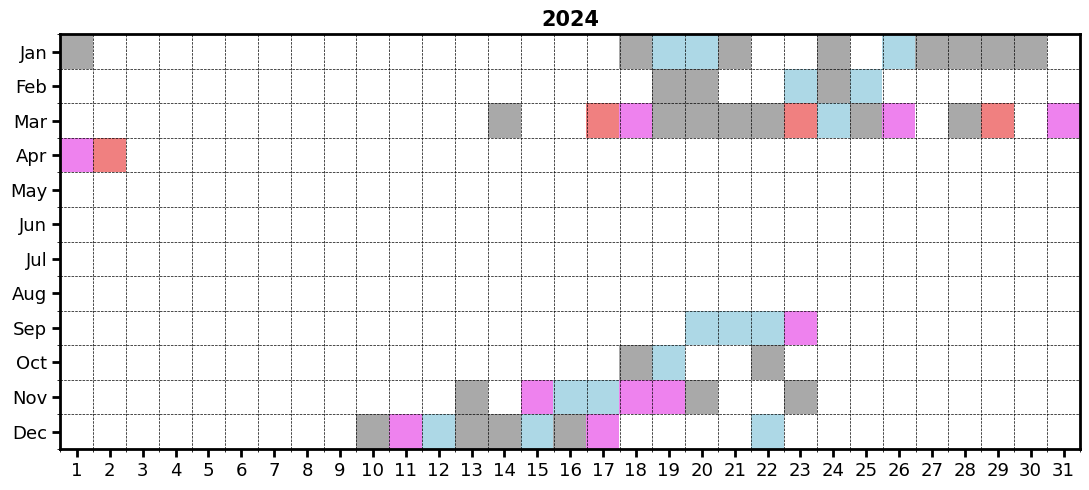

In [86]:
df_dates_available['Year'] = df_dates_available['Date_(yyyy:mm:dd)'].dt.year
df_dates_available['Month'] = df_dates_available['Date_(yyyy:mm:dd)'].dt.month
df_dates_available['Day'] = df_dates_available['Date_(yyyy:mm:dd)'].dt.day

Investment_border_color = 'chartreuse' 

for year in years_Turbid:
    fig, ax = plt.subplots(figsize=(11, 5))
    grid = np.full((12, 31, 3), Missing_color, dtype=float)  

    for category, color in color_map_Turbid.items():
        subset = df_SDA_All_Turbid[(df_SDA_All_Turbid['Year'] == year) & 
                                (df_SDA_All_Turbid['Date_(yyyy:mm:dd)'].isin(eval(f"df_SDA_{category}")))]
        for _, row in subset.iterrows():
            month_idx = int(row['Month']) - 1
            day_idx = int(row['Day']) - 1
            grid[month_idx, day_idx] = color

    ax.imshow(grid, aspect="auto")

    subset_investment = df_dates_available[df_dates_available['Year'] == year]
    for _, row in subset_investment.iterrows():
        month_idx = row['Month'] - 1
        day_idx = row['Day'] - 1
        rect = patches.Rectangle((day_idx - 0.5, month_idx - 0.5), 1, 1, 
                                 linewidth=5, edgecolor=Investment_border_color, facecolor='none')
        ax.add_patch(rect)

    # Título
    ax.set_title(f'{year}', fontsize=15, fontweight='bold')

    # Ejes x e y
    ax.set_xticks(range(31))
    ax.set_xticklabels(range(1, 32), fontsize=15)

    ax.set_yticks(range(12))
    ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

    # Ejes menores para la cuadrícula
    ax.set_xticks(np.arange(-0.5, 31, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 12, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='--', linewidth=0.5)

    # Bordes del gráfico más gruesos
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    # Tamaño y grosor de los ticks
    ax.tick_params(axis='both', labelsize=13, width=2, length=6)

    # Mostrar o guardar
    plt.tight_layout()
    plt.savefig(f'eventos_turbidez_{year}.png', bbox_inches='tight')
    plt.show()

Hacemos un dataframe que contiene solo datos del SSA  a diferentes longitudes de onda para hacer el gráfico de SSA vs $\lambda$ $(nm)$ para cada evento identificado.

In [87]:
lista_SSA = []

for date, zz in SSA_events.items():
    lista_SSA.append(zz)

SSA_events = pd.concat(SSA_events, ignore_index=True)
SSA_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Single_Scattering_Albedo[440nm],Single_Scattering_Albedo[675nm],Single_Scattering_Albedo[870nm],Single_Scattering_Albedo[1020nm],Type
0,2018-08-05,11:30:09,0.9969,0.9960,0.9951,0.9943,Almucantar
1,2018-08-05,12:20:19,0.9967,0.9960,0.9952,0.9944,Hybrid
2,2018-08-13,09:19:24,0.9929,0.9932,0.9924,0.9917,Hybrid
3,2018-08-13,09:29:14,0.9818,0.9828,0.9798,0.9775,Almucantar
4,2018-08-13,10:19:24,0.9968,0.9967,0.9964,0.9961,Hybrid


Hacemos el gráfico de línea de SSA vs $\lambda$ $(nm)$ para cada evento en un solo gráfico.

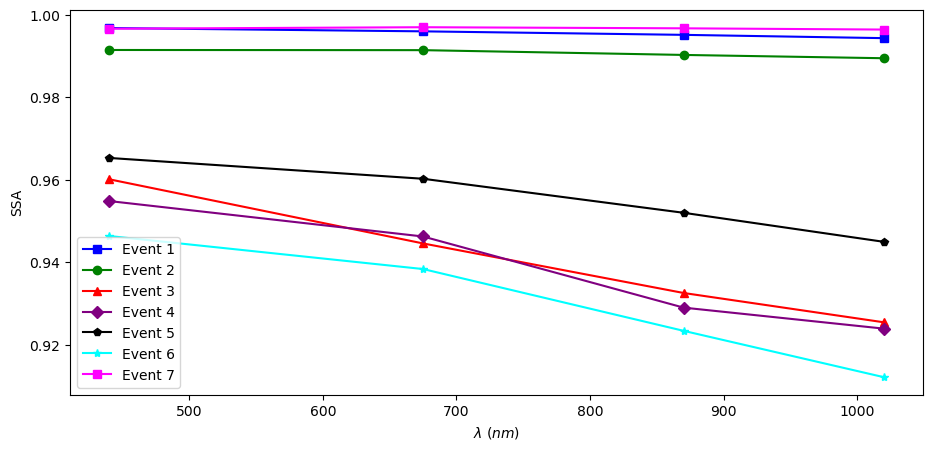

In [88]:
wavelengths = {440: 'Single_Scattering_Albedo[440nm]', 
               675: 'Single_Scattering_Albedo[675nm]', 
               870: 'Single_Scattering_Albedo[870nm]', 
               1020: 'Single_Scattering_Albedo[1020nm]'}

episodes = SSA_events['Date(yyyy:mm:dd)'].unique()

colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan','magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])  

plt.figure(figsize=(11,5))

for i, episode in enumerate(episodes):
    subset = SSA_events[SSA_events['Date(yyyy:mm:dd)'] == episode]
    mean_ssa = [subset[col].mean() for col in wavelengths.values()]
    color = next(colors)
    marker = next(markers)
    plt.plot(wavelengths.keys(), mean_ssa, marker=marker, color=color, 
             label=f'Event {i+1}', linestyle='-', markersize=6)

plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel('SSA')
plt.legend()
plt.show()

Ahora unimos todas las fechas que contienen datos de AOD  a 440 nm para posteriormente hacer el gráfico correspondiente.

In [89]:
lista_AOD = [zz for date, zz in AOD_events.items()]
AOD_events = pd.concat(lista_AOD, ignore_index=True)
AOD_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),AOD_Extinction-Total[440nm],AOD_Extinction-Total[675nm],AOD_Extinction-Total[870nm],AOD_Extinction-Total[1020nm],Type,AOD_Extinction-Fine[440nm],AOD_Extinction-Coarse[440nm]
0,2018-08-05,11:30:09,0.3743,0.1659,0.0940,0.0651,Almucantar,NaN,NaN
1,2018-08-05,12:20:19,0.3050,NaN,NaN,NaN,Hybrid,0.3021,0.0030
2,2018-08-13,09:19:24,0.3633,NaN,NaN,NaN,Hybrid,0.3574,0.0059
3,2018-08-13,09:29:14,0.3689,0.2154,0.1392,0.1031,Almucantar,NaN,NaN
4,2018-08-13,10:19:24,0.3721,NaN,NaN,NaN,Hybrid,0.3646,0.0075


Hacemos lo mismo para los datos de concentración de volumen.

In [90]:
lista_VOL = [zz for date, zz in VOL_events.items()]
VOL_events = pd.concat(lista_VOL, ignore_index=True)
VOL_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),VolC-T,VolC-F,VolC-C,REff-T,REff-F,REff-C,Type
0,2018-08-05,11:30:09,0.049,0.045,0.004,0.158,0.145,2.332,Almucantar
1,2018-08-05,12:20:19,0.044,0.041,0.003,0.146,0.138,1.624,Hybrid
2,2018-08-13,09:19:24,0.040,0.034,0.006,0.239,0.209,1.765,Hybrid
3,2018-08-13,09:29:14,0.045,0.039,0.006,0.245,0.215,2.461,Almucantar
4,2018-08-13,10:19:24,0.045,0.038,0.007,0.226,0.196,1.580,Hybrid


Ahora hacemos el gráfico del AOD  a 440 nm $(AOD_{440nm})$ y la concentración total de volumen de partículas $(VC_T)$.

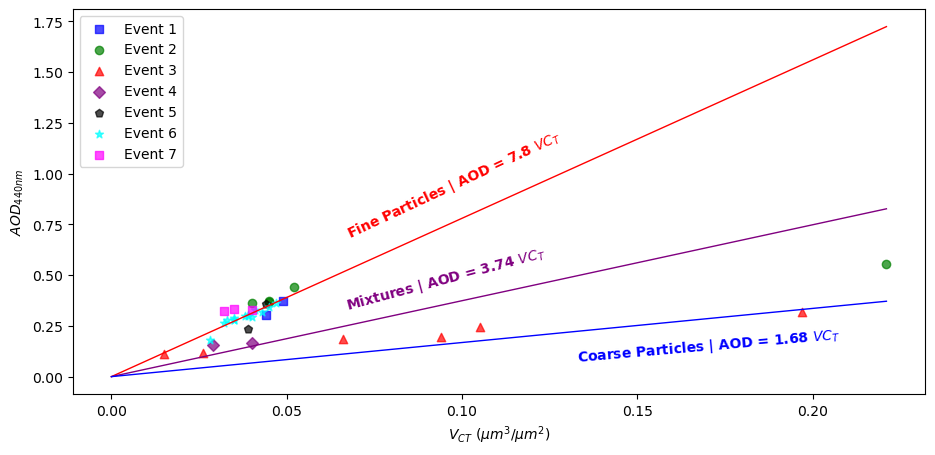

In [91]:
AOD_400 = AOD_events['AOD_Extinction-Total[440nm]']
VCT = VOL_events['VolC-T']
episodes = AOD_events['Date(yyyy:mm:dd)'].unique()

colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan', 'magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])

plt.figure(figsize=(11,5))

for i, episode in enumerate(episodes):
    mask = AOD_events['Date(yyyy:mm:dd)'] == episode
    color = next(colors)
    marker = next(markers)
    plt.scatter(VCT[mask], AOD_400[mask], color=color, marker=marker, label=f'Event {i+1}', alpha=0.7)

x_ref = np.linspace(0, max(VCT), 100)
plt.plot(x_ref, 7.8 * x_ref, 'r-', linewidth=1) 
plt.plot(x_ref, 3.74 * x_ref, 'purple', linewidth=1) 
plt.plot(x_ref, 1.68 * x_ref, 'b-', linewidth=1)

plt.text(max(VCT)*0.3, 7.8 * max(VCT)*0.4, 'Fine Particles | AOD = 7.8 $VC_T$', color='red', 
         fontsize=10, fontweight='bold', rotation=25)
plt.text(max(VCT)*0.3, 3.74 * max(VCT)*0.4, 'Mixtures | AOD = 3.74 $VC_T$', color='purple', 
         fontsize=10, fontweight='bold', rotation=15)
plt.text(max(VCT)*0.6, 1.68 * max(VCT)*0.2, 'Coarse Particles | AOD = 1.68 $VC_T$', color='blue', 
         fontsize=10, fontweight='bold', rotation=5)

plt.xlabel(r'$V_{CT}$ ($\mu m^3/\mu m^2$)')
plt.ylabel(r'$AOD_{440nm}$')
plt.legend()
plt.show()

Hacemos el DataFrame para la distribución de tamaño (SIZ) y luego hacer el gráfico de la distrbución de tamaño con el radio efectivo.

In [92]:
lista_SIZ = [zz for date, zz in SIZ_events.items()]
SIZ_events = pd.concat(lista_SIZ, ignore_index=True)
SIZ_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,...,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Type
0,2018-08-05,11:30:09,0.000153,0.002247,0.014168,0.038908,0.049612,0.034172,0.015852,0.006091,...,0.001774,0.001869,0.001804,0.001656,0.001482,0.001307,0.001124,0.000917,0.000690,Almucantar
1,2018-08-05,12:20:19,0.000288,0.003319,0.016907,0.038862,0.043119,0.026663,0.011909,0.005196,...,0.001557,0.001243,0.000906,0.000639,0.000460,0.000349,0.000284,0.000248,0.000233,Hybrid
2,2018-08-13,09:19:24,0.000392,0.000820,0.002072,0.006035,0.017062,0.034094,0.034800,0.018362,...,0.003150,0.002670,0.002070,0.001586,0.001254,0.001019,0.000825,0.000642,0.000473,Hybrid
3,2018-08-13,09:29:14,0.000463,0.000956,0.002389,0.006870,0.018785,0.034656,0.034272,0.022661,...,0.002953,0.002613,0.002253,0.002126,0.002229,0.002301,0.001904,0.001054,0.000361,Almucantar
4,2018-08-13,10:19:24,0.000317,0.001194,0.003901,0.010827,0.023733,0.035478,0.031828,0.018202,...,0.003991,0.002890,0.001937,0.001336,0.001006,0.000826,0.000712,0.000617,0.000525,Hybrid


Hacemos el gráfico de distribución de tamaño con el radio efectivo para cada evento identificado.

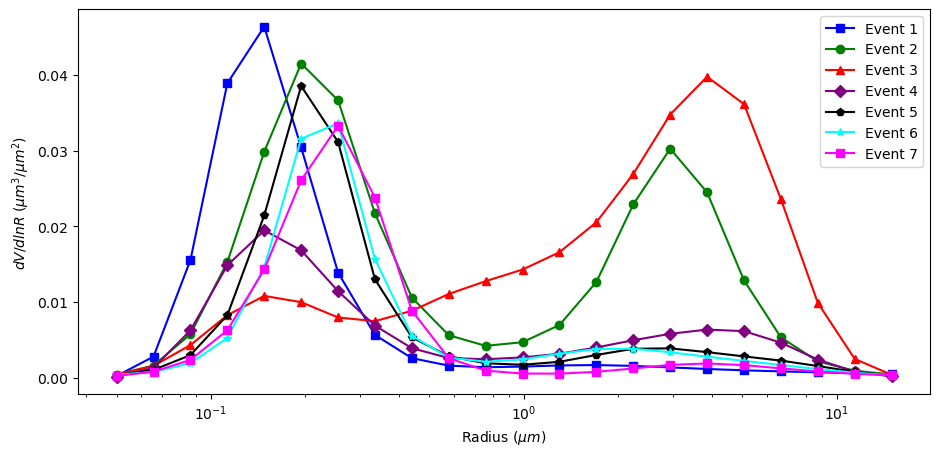

In [93]:
numeric_columns = SIZ_events.columns[2:] 
numeric_columns = [col for col in numeric_columns if col.replace('.', '', 1).isdigit()] 
radius_values = np.array(numeric_columns, dtype=float)

episodes = SIZ_events['Date(yyyy:mm:dd)'].unique()

colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan', 'magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])

plt.figure(figsize=(11,5))


for i, episode in enumerate(episodes):
    subset = SIZ_events[SIZ_events['Date(yyyy:mm:dd)'] == episode]

    dV_dlnR = subset[numeric_columns].mean(axis=0).values  

    color = next(colors)
    marker = next(markers)

    plt.plot(radius_values, dV_dlnR, marker=marker, color=color, label=f'Event {i+1}', linestyle="-", markersize=6)
    #plt.fill_between(radius_values, dV_dlnR - dV_dlnR * 0.2, dV_dlnR + dV_dlnR * 0.2, color=color, alpha=0.2)  

plt.xscale('log') 
plt.xlabel('Radius ($\mu m$)')
plt.ylabel(r'$dV/dlnR$ ($\mu m^3/\mu m^2$)')
plt.legend()
plt.show()

Hacemos el DataFrame para el parámetro de asimetría (g) para todos los datos de los eventos de alta turbiedad identificados.

In [94]:
lista_ASY = [zz for date, zz in ASY_events.items()]
ASY_events = pd.concat(lista_ASY, ignore_index=True)
ASY_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Asymmetry_Factor-Total[440nm],Asymmetry_Factor-Total[675nm],Asymmetry_Factor-Total[870nm],Asymmetry_Factor-Total[1020nm],Type
0,2018-08-05,11:30:09,0.659867,0.543400,0.466794,0.421972,Almucantar
1,2018-08-05,12:20:19,0.653418,0.531414,0.460652,0.424399,Hybrid
2,2018-08-13,09:19:24,0.692684,0.640480,0.587413,0.551140,Hybrid
3,2018-08-13,09:29:14,0.701308,0.652728,0.604718,0.571192,Almucantar
4,2018-08-13,10:19:24,0.693266,0.629684,0.579661,0.548370,Hybrid


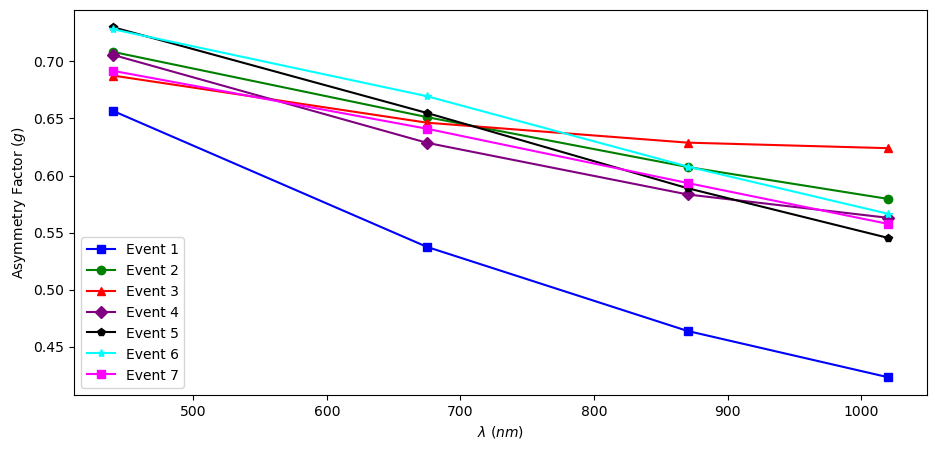

In [95]:
wavelengths = {440: 'Asymmetry_Factor-Total[440nm]', 
               675: 'Asymmetry_Factor-Total[675nm]', 
               870: 'Asymmetry_Factor-Total[870nm]', 
               1020: 'Asymmetry_Factor-Total[1020nm]'}

episodes = ASY_events['Date(yyyy:mm:dd)'].unique()

colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan', 'magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])

plt.figure(figsize=(11,5))

for i, episode in enumerate(episodes):
    subset = ASY_events[ASY_events['Date(yyyy:mm:dd)'] == episode]
    
    mean_asy = [subset[col].mean() for col in wavelengths.values()]
    
    color = next(colors)
    marker = next(markers)
    
    plt.plot(wavelengths.keys(), mean_asy, marker=marker, color=color, 
             label=f'Event {i+1}', linestyle='-', markersize=6)

plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel(r'Asymmetry Factor $(g)$')
plt.legend()
plt.show()

Hacemos el dataframe para el índice de refracción, para posteriormente hacer ambos gráficos (parte real e imaginaria).

In [96]:
lista_RIN = [zz for date, zz in RIN_events.items()]
RIN_events = pd.concat(lista_RIN, ignore_index=True)
RIN_events.head()

,Date(yyyy:mm:dd),Time(hh:mm:ss),Refractive_Index-Real_Part[440nm],Refractive_Index-Real_Part[675nm],Refractive_Index-Real_Part[870nm],Refractive_Index-Real_Part[1020nm],Refractive_Index-Imaginary_Part[440nm],Refractive_Index-Imaginary_Part[675nm],Refractive_Index-Imaginary_Part[870nm],Refractive_Index-Imaginary_Part[1020nm],Type
0,2018-08-05,11:30:09,1.4839,1.5108,1.5282,1.5368,0.000514,0.000514,0.000514,0.000514,Almucantar
1,2018-08-05,12:20:19,1.4644,1.5097,1.5329,1.5377,0.000500,0.000500,0.000500,0.000500,Hybrid
2,2018-08-13,09:19:24,1.5487,1.5425,1.5484,1.5486,0.001213,0.001159,0.001178,0.001182,Hybrid
3,2018-08-13,09:29:14,1.5157,1.5089,1.5105,1.5084,0.003084,0.002861,0.003013,0.003056,Almucantar
4,2018-08-13,10:19:24,1.5098,1.5260,1.5355,1.5351,0.000506,0.000500,0.000500,0.000500,Hybrid


Hacemos el gráfico de el índice de refracción de la parte real e imaginaria con respecto a la longitud de onda $\lambda(nm)$.

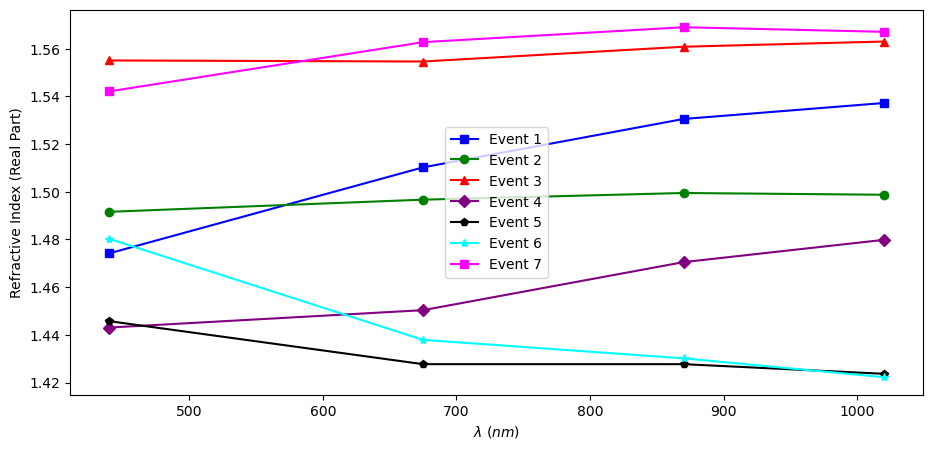

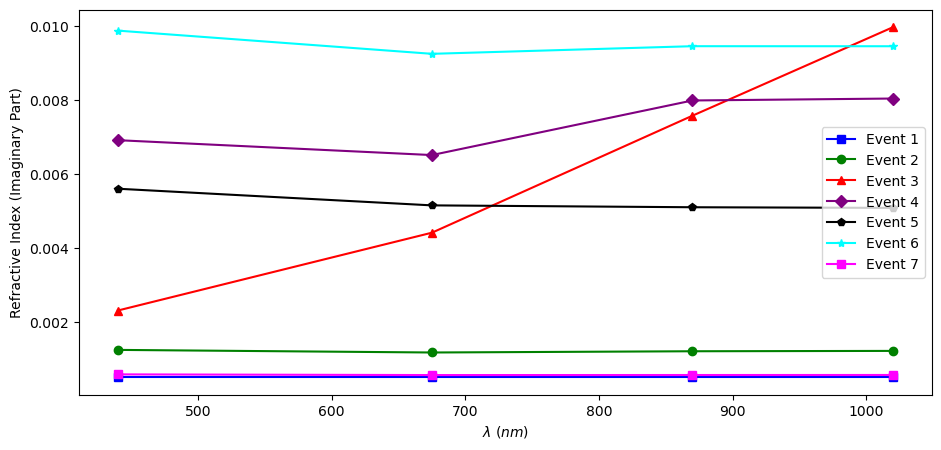

In [97]:
wavelengths_real = {440: 'Refractive_Index-Real_Part[440nm]', 
                    675: 'Refractive_Index-Real_Part[675nm]', 
                    870: 'Refractive_Index-Real_Part[870nm]', 
                    1020: 'Refractive_Index-Real_Part[1020nm]'}

wavelengths_imag = {440: 'Refractive_Index-Imaginary_Part[440nm]', 
                    675: 'Refractive_Index-Imaginary_Part[675nm]', 
                    870: 'Refractive_Index-Imaginary_Part[870nm]', 
                    1020: 'Refractive_Index-Imaginary_Part[1020nm]'}

episodes = RIN_events['Date(yyyy:mm:dd)'].unique()

colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan', 'magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])  

plt.figure(figsize=(11,5))
for i, episode in enumerate(episodes):
    subset = RIN_events[RIN_events['Date(yyyy:mm:dd)'] == episode]
    mean_rindex_real = [subset[col].mean() for col in wavelengths_real.values()]
    color = next(colors)
    marker = next(markers)
    plt.plot(wavelengths_real.keys(), mean_rindex_real, marker=marker, color=color, 
             label=f'Event {i+1}', linestyle='-', markersize=6)

plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel('Refractive Index (Real Part)')
plt.legend()
plt.show()

plt.figure(figsize=(11,5))
colors = itertools.cycle(['blue', 'green', 'red', 'purple', 'black', 'cyan', 'magenta'])
markers = itertools.cycle(['s', 'o', '^', 'D', 'p', '*'])  

for i, episode in enumerate(episodes):
    subset = RIN_events[RIN_events['Date(yyyy:mm:dd)'] == episode]
    mean_rindex_imag = [subset[col].mean() for col in wavelengths_imag.values()]
    color = next(colors)
    marker = next(markers)
    plt.plot(wavelengths_imag.keys(), mean_rindex_imag, marker=marker, color=color, 
             label=f'Event {i+1}', linestyle='-', markersize=6)

plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel('Refractive Index (Imaginary Part)')
plt.legend()
plt.show()

Observamos los días que quedaron que tienen datos de inversión y su naturaleza.

In [98]:
df_dates_available['Event'] = ['Event ' + str(i+1) for i in range(len(df_dates_available))]
df_dates_available_display = df_dates_available[['Date_(yyyy:mm:dd)', 'Event_Turbidity_Type', 'Event']]
df_dates_available_display

,Date_(yyyy:mm:dd),Event_Turbidity_Type,Event
0,2018-08-05,Fine,Event 1
1,2018-08-13,Fine,Event 2
2,2020-05-03,Mixture,Event 3
3,2020-07-24,Fine,Event 4
4,2020-07-25,Fine,Event 5
5,2020-07-26,Fine,Event 6
6,2021-08-21,Fine,Event 7


Cargamos los datos de medida directa del AOD a diferentes longitudes de onda.

In [99]:
df_AOD_Solar = pd.read_csv('20170101_20241231_Ny_Alesund_AWI.lev20', skiprows=6)
df_AOD_Solar.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:06:2017,14:40:44,152,152.611620,0.012223,0.017789,0.020722,-999.0,-999.0,0.024245,...,0.3796,0.3409,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:06:2017,14:43:43,152,152.613692,0.012846,0.018747,0.021550,-999.0,-999.0,0.025016,...,0.3796,0.3409,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:06:2017,14:49:43,152,152.617859,0.013405,0.019388,0.022183,-999.0,-999.0,0.025734,...,0.3796,0.3409,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:06:2017,14:52:43,152,152.619942,0.013825,0.019844,0.022771,-999.0,-999.0,0.026206,...,0.3796,0.3409,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:06:2017,14:55:43,152,152.622025,0.013755,0.019966,0.022488,-999.0,-999.0,0.026184,...,0.3796,0.3409,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Hacemos lo mismo para los datos lunares.

In [100]:
df_AOD_Lunar = pd.read_csv('Lunar_20170101_20241231_Ny_Alesund_AWI.lev15', skiprows=6)
df_AOD_Lunar.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,06:10:2017,19:05:36,279,279.795556,0.003937,0.014694,0.015596,-999.0,-999.0,0.018065,...,-999.0,-999.0,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,06:10:2017,19:10:36,279,279.799028,0.003670,0.014030,0.014949,-999.0,-999.0,0.017272,...,-999.0,-999.0,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,06:10:2017,19:15:36,279,279.802500,0.003436,0.014052,0.015003,-999.0,-999.0,0.017245,...,-999.0,-999.0,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,06:10:2017,19:20:36,279,279.805972,0.003587,0.013809,0.014954,-999.0,-999.0,0.017294,...,-999.0,-999.0,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,06:10:2017,19:25:36,279,279.809444,0.003848,0.014897,0.015592,-999.0,-999.0,0.018103,...,-999.0,-999.0,0.9376,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Unimos ambos DataFrames.

In [101]:
df_AOD = pd.concat([df_AOD_Solar, df_AOD_Lunar], ignore_index=True)
df_AOD.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4,Measurement_Type(solar or lunar),Lunar_Zenith_Angle(Degrees),Lunar_Phase_Angle(Degrees)
0,01:06:2017,14:40:44,152,152.611620,0.012223,0.017789,0.020722,-999.0,-999.0,0.024245,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
1,01:06:2017,14:43:43,152,152.613692,0.012846,0.018747,0.021550,-999.0,-999.0,0.025016,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
2,01:06:2017,14:49:43,152,152.617859,0.013405,0.019388,0.022183,-999.0,-999.0,0.025734,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
3,01:06:2017,14:52:43,152,152.619942,0.013825,0.019844,0.022771,-999.0,-999.0,0.026206,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN
4,01:06:2017,14:55:43,152,152.622025,0.013755,0.019966,0.022488,-999.0,-999.0,0.026184,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN


Observamos las columnas presentes para extraer la información de interés.

In [102]:
#for ii in range(len(df_AOD.columns)):
    #print(df_AOD.columns[ii])

Extraemos las columnas que contienen datos relevantes para nuestro caso.

In [103]:
df_AOD_filtered = df_AOD[['Date(dd:mm:yyyy)', 'Time(hh:mm:ss)', 'AOD_1020nm', '440-870_Angstrom_Exponent']]

df_AOD_filtered.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),AOD_1020nm,440-870_Angstrom_Exponent
0,01:06:2017,14:40:44,0.017789,1.273438
1,01:06:2017,14:43:43,0.018747,1.243591
2,01:06:2017,14:49:43,0.019388,1.209900
3,01:06:2017,14:52:43,0.019844,1.209600
4,01:06:2017,14:55:43,0.019966,1.211243


Cambiamos el formato de la fecha para simplificar posteriores análisis.

In [104]:
df_AOD_filtered = df_AOD_filtered.copy()
df_AOD_filtered['Date(dd:mm:yyyy)'] = pd.to_datetime(df_AOD_filtered['Date(dd:mm:yyyy)'], format='%d:%m:%Y')
#df_AOD_filtered = df_AOD_filtered[df_AOD_filtered['Date(dd:mm:yyyy)'].isin(df_dates_available['Date_(yyyy:mm:dd)'])]
df_AOD_filtered.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),AOD_1020nm,440-870_Angstrom_Exponent
0,2017-06-01,14:40:44,0.017789,1.273438
1,2017-06-01,14:43:43,0.018747,1.243591
2,2017-06-01,14:49:43,0.019388,1.209900
3,2017-06-01,14:52:43,0.019844,1.209600
4,2017-06-01,14:55:43,0.019966,1.211243


Reemplazamos los valores de -999.0 por NaN (Not a Number) para evitar errores en los posteriores cálculos.

In [105]:
df_AOD_filtered.replace(-999.0, np.nan, inplace=True)
df_AOD_filtered.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),AOD_1020nm,440-870_Angstrom_Exponent
0,2017-06-01,14:40:44,0.017789,1.273438
1,2017-06-01,14:43:43,0.018747,1.243591
2,2017-06-01,14:49:43,0.019388,1.209900
3,2017-06-01,14:52:43,0.019844,1.209600
4,2017-06-01,14:55:43,0.019966,1.211243


Hacemos la interpolación para cada una de las fechas para el $\beta$ (AOD_1020nm) y $\alpha$ (440-870_Angstrom_Exponent).

In [106]:
df_AOD_filtered[df_AOD_filtered['Date(dd:mm:yyyy)']=='2018-08-12']

,Date(dd:mm:yyyy),Time(hh:mm:ss),AOD_1020nm,440-870_Angstrom_Exponent
3022,2018-08-12,10:18:03,0.011971,1.616738
3023,2018-08-12,10:27:55,0.012409,1.632330
3024,2018-08-12,10:38:01,0.012595,1.630994
3025,2018-08-12,10:48:03,0.012108,1.621143
3026,2018-08-12,11:27:56,0.011662,1.618961
3027,2018-08-12,11:38:05,0.011900,1.623073
3028,2018-08-12,12:03:03,0.010815,1.673932
3029,2018-08-12,12:18:03,0.010419,1.640386
3030,2018-08-12,12:27:53,0.011321,1.657839
3031,2018-08-12,12:37:59,0.011393,1.676663
